## About Dataset
CONTEXT

The online sector, referred to as “clicks,” has been slowly eating up market share in the past two decades.

E-commerce platform allows people to buy products from books, toys, clothes, and shoes to food, furniture, and other household items.

CONTENT

This is simple data set of US superstore from 2014-2018.

INSPIRATION

So,what questions can be answered looking at this data?

How much profit is gained for each product?

People from city/state shop the most?

Which customer is regular/loyal over the years?

Products having high discount rate?


The dataset contains sales details of different stores of a supermarket chain that has multiple 
stores in different parts of the US. 
With columns such as:

Ship Mode: Shipping class

Segment: Customer type

Country: USA

City: The city in USA where the store is located

State: Which State of the US

Postal code: Postal code of the area

Region: The region - East, West, North, South, Central

Category: Category of item purchased

Sub-category: Sub category of the purchased item

Sales: Sale of the particular item

Quantity: Number of items

Discount: Discount on the item

Profit: Profit on the sales

## 1) Import all the Libraries =>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

## 2) Read Dataset => (Import dataset)

In [2]:
dataset = pd.read_excel("US Superstore data.xls")

As we dont have installe xlrd bibrary so first install this..

In [3]:
!pip install xlrd

In [4]:
# Again import the dataset..
dataset = pd.read_excel("US Superstore data.xls")

In [5]:
# Get sample of the dataset as the datset is too much large..
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Some of the columns are not showing for thsi we will set the max_columns..
pd.set_option("display.max_columns",21)

In [7]:
dataset.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


Now we are able to view all the columns..

In [8]:
# lets check the shape of the dataset..
dataset.shape

(9994, 21)

In [9]:
# Get the info of dataset..
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [10]:
## Lets create a copy of dataset..
dataset_copied = dataset.copy()

## 3) Handle missing data (Missing value analysis)..

In [11]:
# Check for missing values..
dataset_copied.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Here we dont have any missing values..

### Set Row Id as index for the dataset..

In [12]:
dataset_copied.set_index(dataset["Row ID"].values, inplace=True)

In [13]:
dataset_copied.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [14]:
### Check for unique values..
dataset_copied.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
dtype: int64

### Lets delete unwanted columns..

In [15]:
dataset_copied.drop(dataset[["Row ID","Order ID","Customer ID","Customer Name"]], axis=1, inplace=True)

In [16]:
# As the country columns having only one category we will delete that column also..
dataset_copied.drop(["Country"], axis=1, inplace=True)

In [17]:
dataset_copied.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Ship Date     9994 non-null   datetime64[ns]
 2   Ship Mode     9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   City          9994 non-null   object        
 5   State         9994 non-null   object        
 6   Postal Code   9994 non-null   int64         
 7   Region        9994 non-null   object        
 8   Product ID    9994 non-null   object        
 9   Category      9994 non-null   object        
 10  Sub-Category  9994 non-null   object        
 11  Product Name  9994 non-null   object        
 12  Sales         9994 non-null   float64       
 13  Quantity      9994 non-null   int64         
 14  Discount      9994 non-null   float64       
 15  Profit        9994 non-null   float64      

In [18]:
dataset_copied.head(2)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# 4) Explore data characteristics =>

In [19]:
dataset_copied.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [20]:
dataset_copied.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 1 to 9994
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    9994 non-null   datetime64[ns]
 1   Ship Date     9994 non-null   datetime64[ns]
 2   Ship Mode     9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   City          9994 non-null   object        
 5   State         9994 non-null   object        
 6   Postal Code   9994 non-null   int64         
 7   Region        9994 non-null   object        
 8   Product ID    9994 non-null   object        
 9   Category      9994 non-null   object        
 10  Sub-Category  9994 non-null   object        
 11  Product Name  9994 non-null   object        
 12  Sales         9994 non-null   float64       
 13  Quantity      9994 non-null   int64         
 14  Discount      9994 non-null   float64       
 15  Profit        9994 non-null   float64      

In [21]:
dataset_copied.describe()

,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [22]:
dataset_copied.describe(include='object')

,Ship Mode,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,531,49,4,1862,3,17,1850
top,Standard Class,Consumer,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,5968,5191,915,2001,3203,19,6026,1523,48


### Finding Outliers..

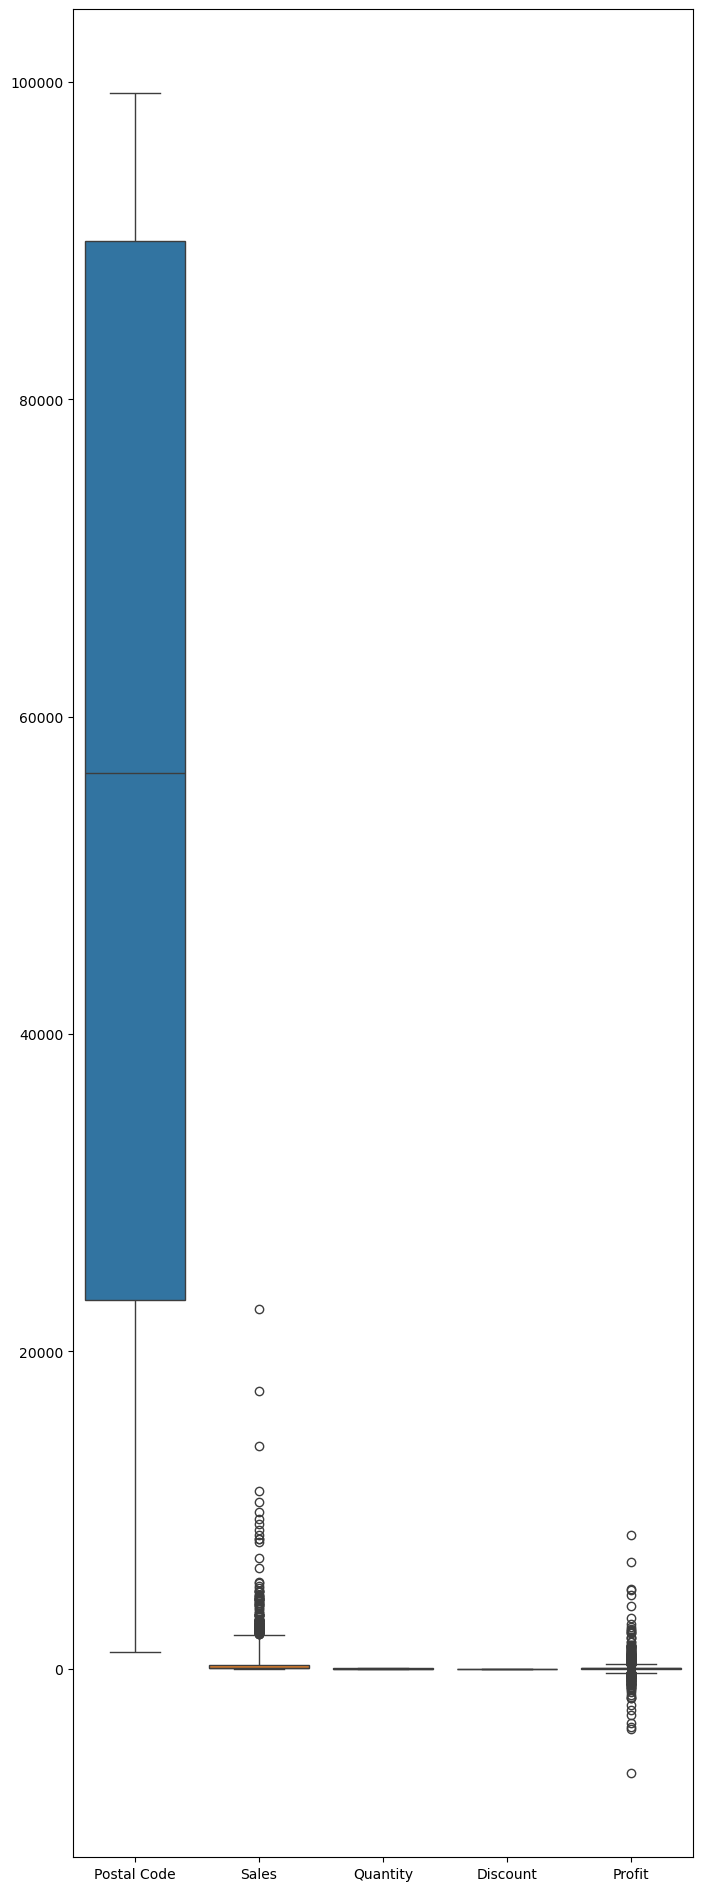

In [23]:
# Ploting Boxplot..for checking outliers...
plt.figure(figsize=(8,24))
sns.boxplot(data=dataset_copied, whis=10)
plt.show()

### Outliers are present in the data

## Use median method for outliers treatment..

In [24]:
out_data = dataset_copied[["Sales","Quantity","Discount","Profit"]]
out_data.head()

,Sales,Quantity,Discount,Profit
1,261.9600,2,0.00,41.9136
2,731.9400,3,0.00,219.5820
3,14.6200,2,0.00,6.8714
4,957.5775,5,0.45,-383.0310
5,22.3680,2,0.20,2.5164


In [25]:
# finding Q1, Q3, IQR, UL & LL for each column..
Q1 = out_data.quantile(0.25)
Q3 = out_data.quantile(0.75)
IQR = Q3 - Q1

LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR

print(f"Q1 : {Q1} | Q3 : {Q3} | IQR : {IQR} | LL : {LL} | UL : {UL} ")

Q1 : Sales       17.28000
Quantity     2.00000
Discount     0.00000
Profit       1.72875
Name: 0.25, dtype: float64 | Q3 : Sales       209.940
Quantity      5.000
Discount      0.200
Profit       29.364
Name: 0.75, dtype: float64 | IQR : Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64 | LL : Sales      -271.710000
Quantity     -2.500000
Discount     -0.300000
Profit      -39.724125
dtype: float64 | UL : Sales       498.930000
Quantity      9.500000
Discount      0.500000
Profit       70.816875
dtype: float64 


In [26]:
LL_count = out_data[(out_data < (Q1 - 1.5 * IQR))].sum()
UL_count = out_data[(out_data > (Q3 + 1.5 * IQR))].sum()
print(f"LOWER OUTLIERS :\n{LL_count}")
print(f"UPPER OUTLIERS :\n{UL_count}")

LOWER OUTLIERS :
Sales            0.0000
Quantity         0.0000
Discount         0.0000
Profit     -140327.3647
dtype: float64
UPPER OUTLIERS :
Sales       1.477483e+06
Quantity    1.977000e+03
Discount    6.154000e+02
Profit      3.325804e+05
dtype: float64


In [27]:
per_LL_out = LL_count*100 / LL_count.shape[0]
per_UL_out = UL_count*100 / UL_count.shape[0]
print(f"Lower outliers percentages:\n\n{per_LL_out}\n")
print(f"Upper outliers percentages:\n\n{per_UL_out}")

Lower outliers percentages:

Sales       0.000000e+00
Quantity    0.000000e+00
Discount    0.000000e+00
Profit     -3.508184e+06
dtype: float64

Upper outliers percentages:

Sales       3.693707e+07
Quantity    4.942500e+04
Discount    1.538500e+04
Profit      8.314511e+06
dtype: float64


# 5) Data Visualisation =>

In [28]:
dataset_copied.head(2)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


#### 1) Analyzing the ship mode column..

In [29]:
dataset_copied["Ship Mode"].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [30]:
dataset_copied.Segment.value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

In [31]:
dataset_copied.Category.value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [32]:
dataset_copied.Region.value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Region')

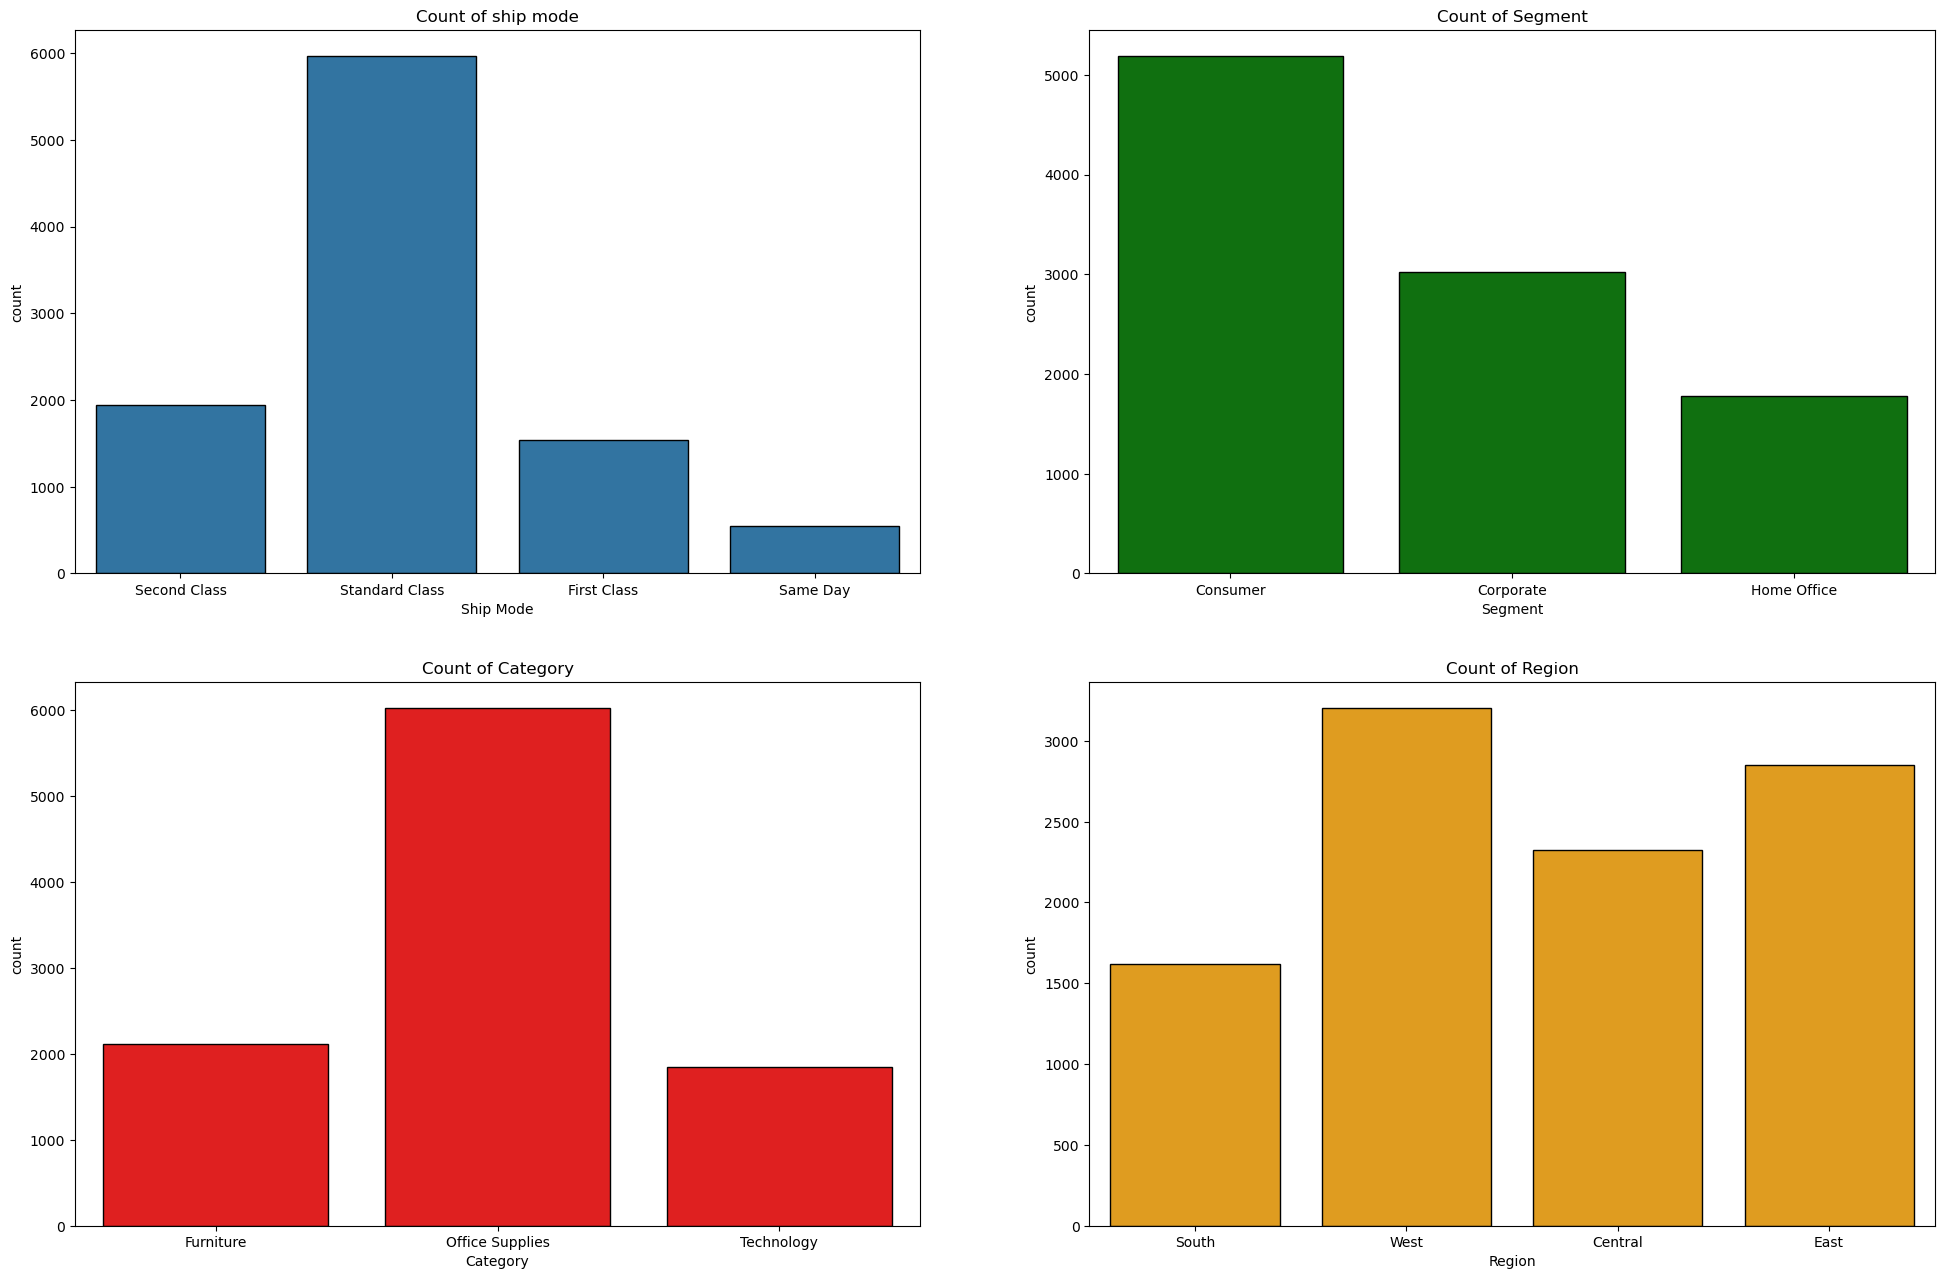

In [33]:
fig = plt.figure(figsize=(24,24))
ax=fig.add_subplot(3,2,1)
sns.countplot(x="Ship Mode", data=dataset_copied, edgecolor='black')
plt.title("Count of ship mode")
ax=fig.add_subplot(3,2,2)
sns.countplot(x="Segment", data=dataset_copied, color="Green", edgecolor='black')
plt.title("Count of Segment")
ax=fig.add_subplot(3,2,3)
sns.countplot(x="Category", data=dataset_copied, color="Red", edgecolor='black')
plt.title("Count of Category")
ax=fig.add_subplot(3,2,4)
sns.countplot(x="Region", data=dataset_copied, color="Orange", edgecolor='black')
plt.title("Count of Region")

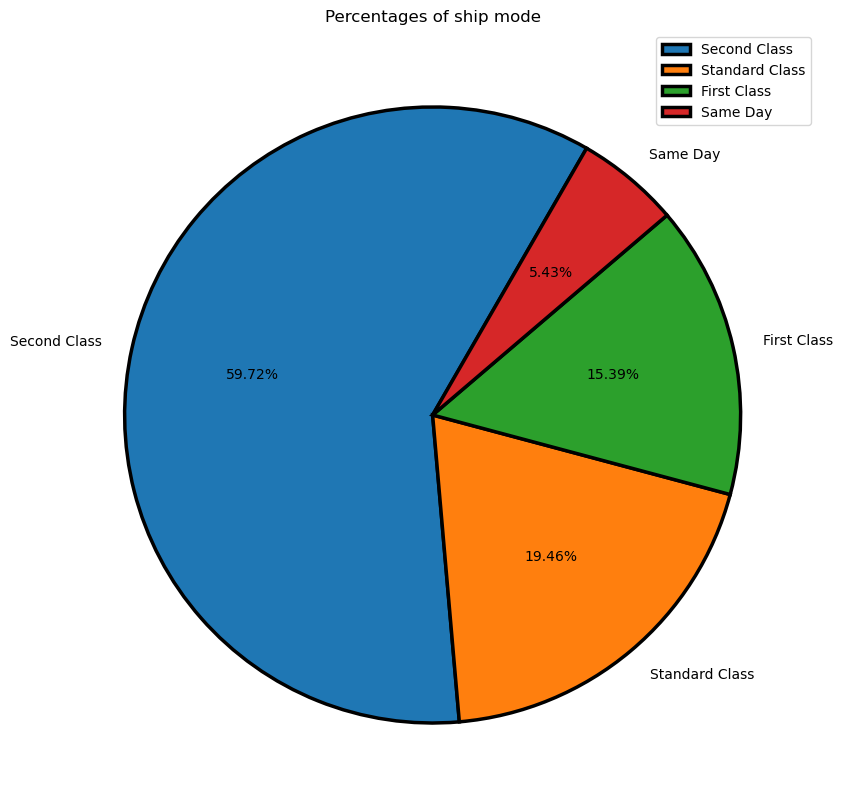

In [34]:
plt.figure(figsize=(10,10))
values = dataset_copied["Ship Mode"].value_counts()
labels = dataset_copied["Ship Mode"].unique()
plt.pie(x=values, labels=labels, startangle=60, autopct="%0.2f%%", 
        wedgeprops={'edgecolor': 'black', 'linewidth': 2.5, 'antialiased': True})
plt.title("Percentages of ship mode")
plt.legend(loc=1)
plt.show()

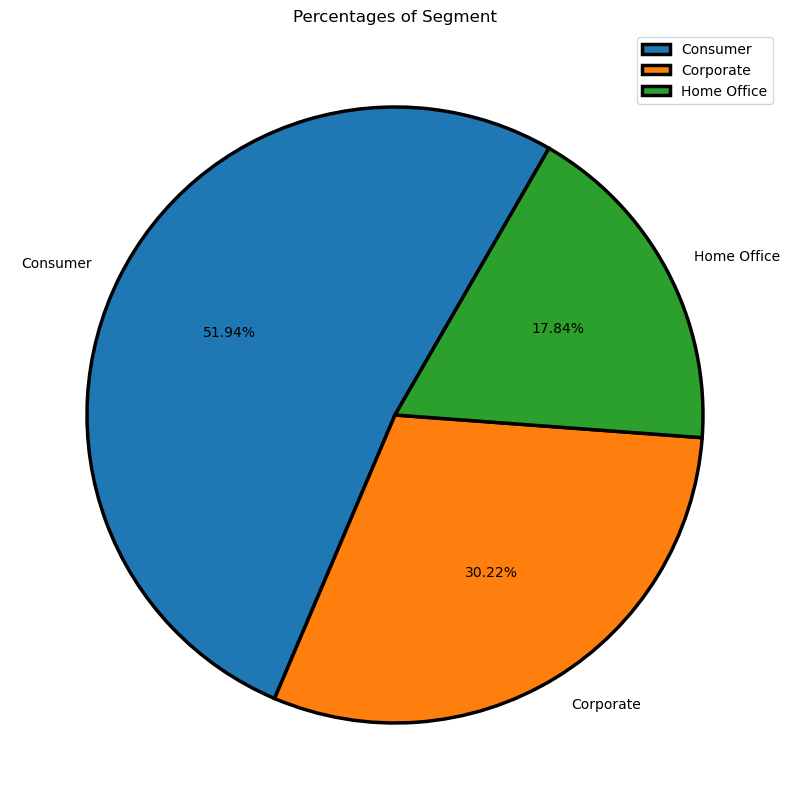

In [35]:
plt.figure(figsize=(10,10))
values = dataset_copied["Segment"].value_counts()
labels = dataset_copied["Segment"].unique()
plt.pie(x=values, labels=labels, startangle=60, autopct="%0.2f%%",
        wedgeprops={'edgecolor': 'black', 'linewidth': 2.5, 'antialiased': True, })
plt.title("Percentages of Segment")
plt.legend(loc=1)
plt.show()

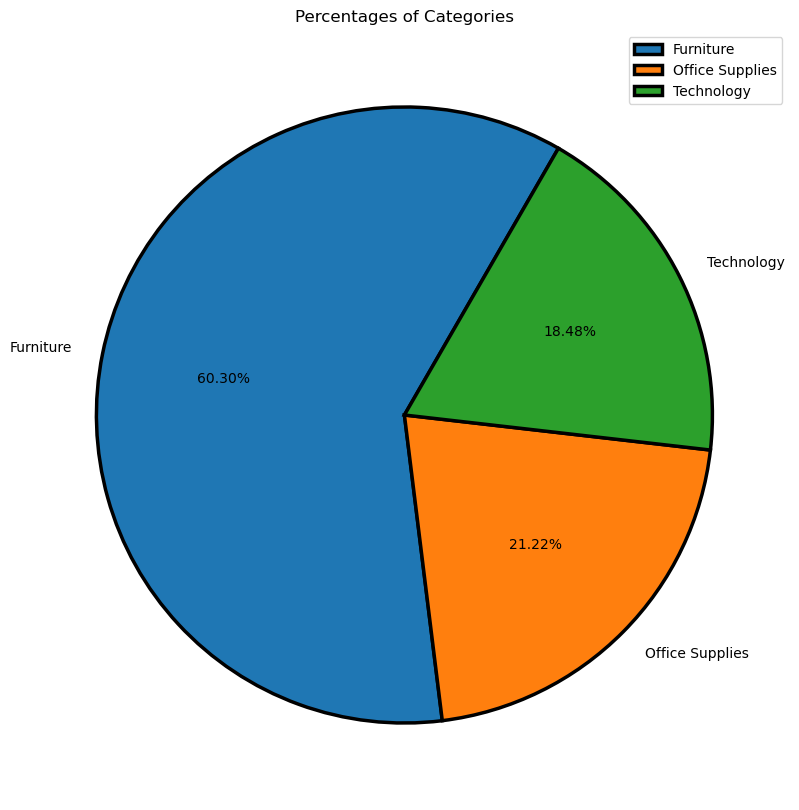

In [36]:
plt.figure(figsize=(10,10))
values = dataset_copied["Category"].value_counts()
labels = dataset_copied["Category"].unique()
plt.pie(x=values, labels=labels, startangle=60, autopct="%0.2f%%",
        wedgeprops={'edgecolor': 'black', 'linewidth': 2.5, 'antialiased': True, })
plt.title("Percentages of Categories")
plt.legend(loc=1)
plt.show()

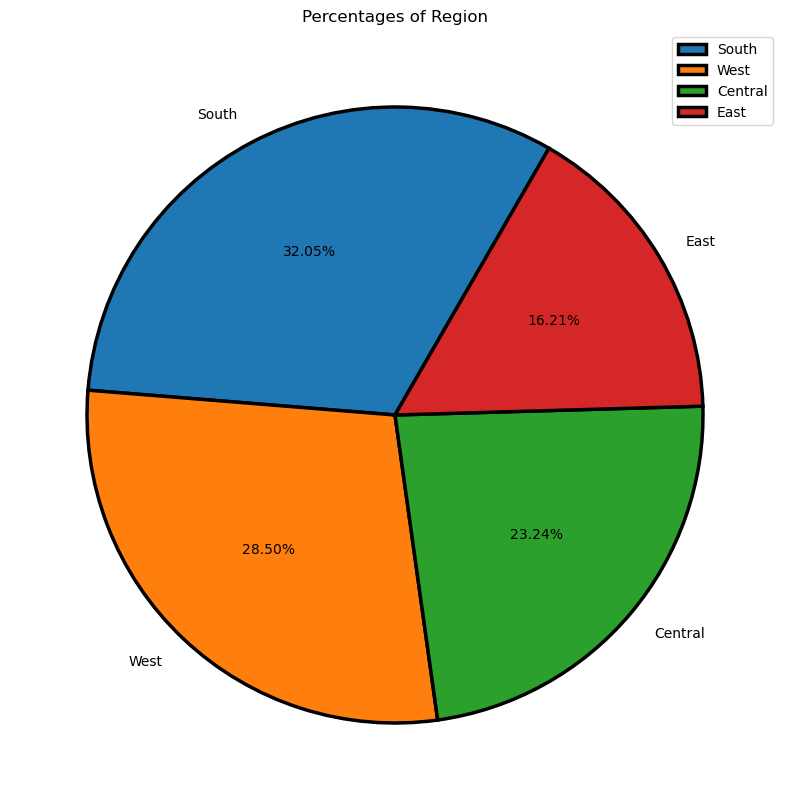

In [37]:
plt.figure(figsize=(10,10))
values = dataset_copied["Region"].value_counts()
labels = dataset_copied["Region"].unique()
plt.pie(x=values, labels=labels, startangle=60, autopct="%0.2f%%",
        wedgeprops={'edgecolor': 'black', 'linewidth': 2.5, 'antialiased': True, })
plt.title("Percentages of Region")
plt.legend(loc=1)
plt.show()

In [38]:
dataset_copied.head(2)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


Text(0.5, 1.0, 'Count of Region')

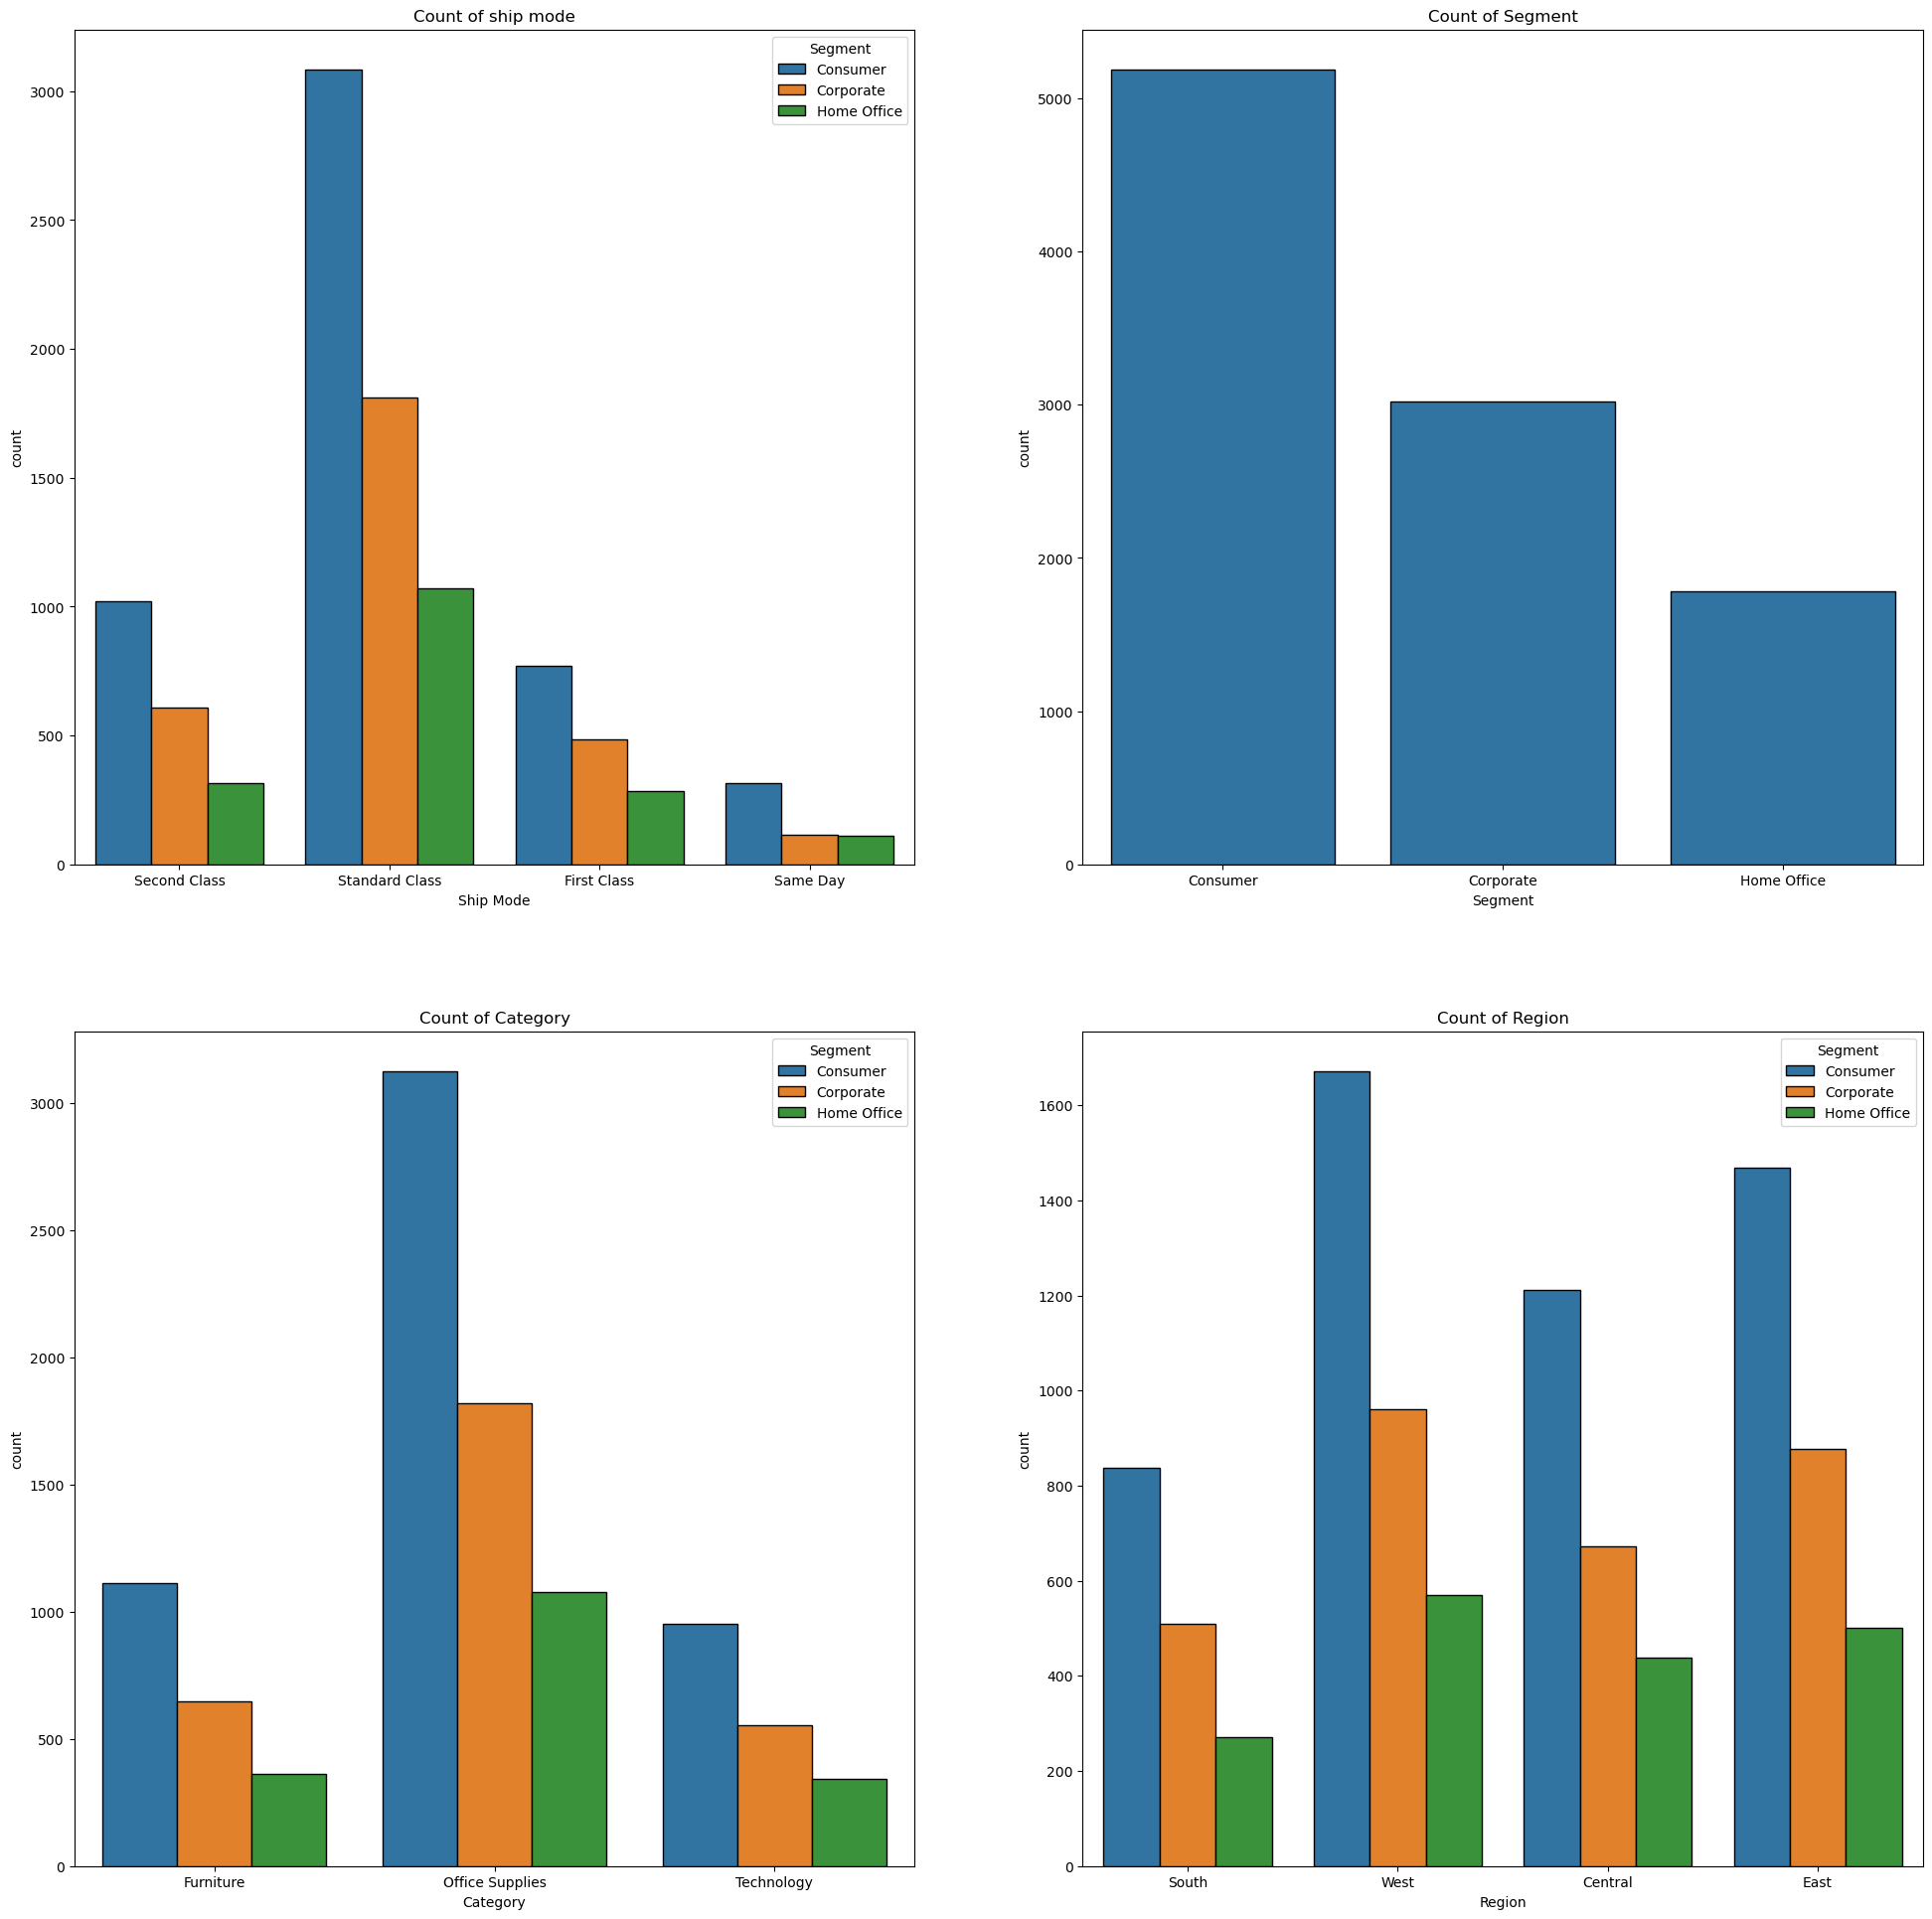

In [39]:
fig = plt.figure(figsize=(24,24))
ax=fig.add_subplot(2,2,1)
sns.countplot(x="Ship Mode", data=dataset_copied, hue="Segment", edgecolor='black')
plt.title("Count of ship mode")
ax=fig.add_subplot(2,2,2)
sns.countplot(x="Segment", data=dataset_copied, edgecolor='black')
plt.title("Count of Segment")
ax=fig.add_subplot(2,2,3)
sns.countplot(x="Category", data=dataset_copied, hue="Segment", edgecolor='black')
plt.title("Count of Category")
ax=fig.add_subplot(2,2,4)
sns.countplot(x="Region", data=dataset_copied, hue="Segment", edgecolor='black')
plt.title("Count of Region")

Text(0.5, 1.0, 'Count of Region')

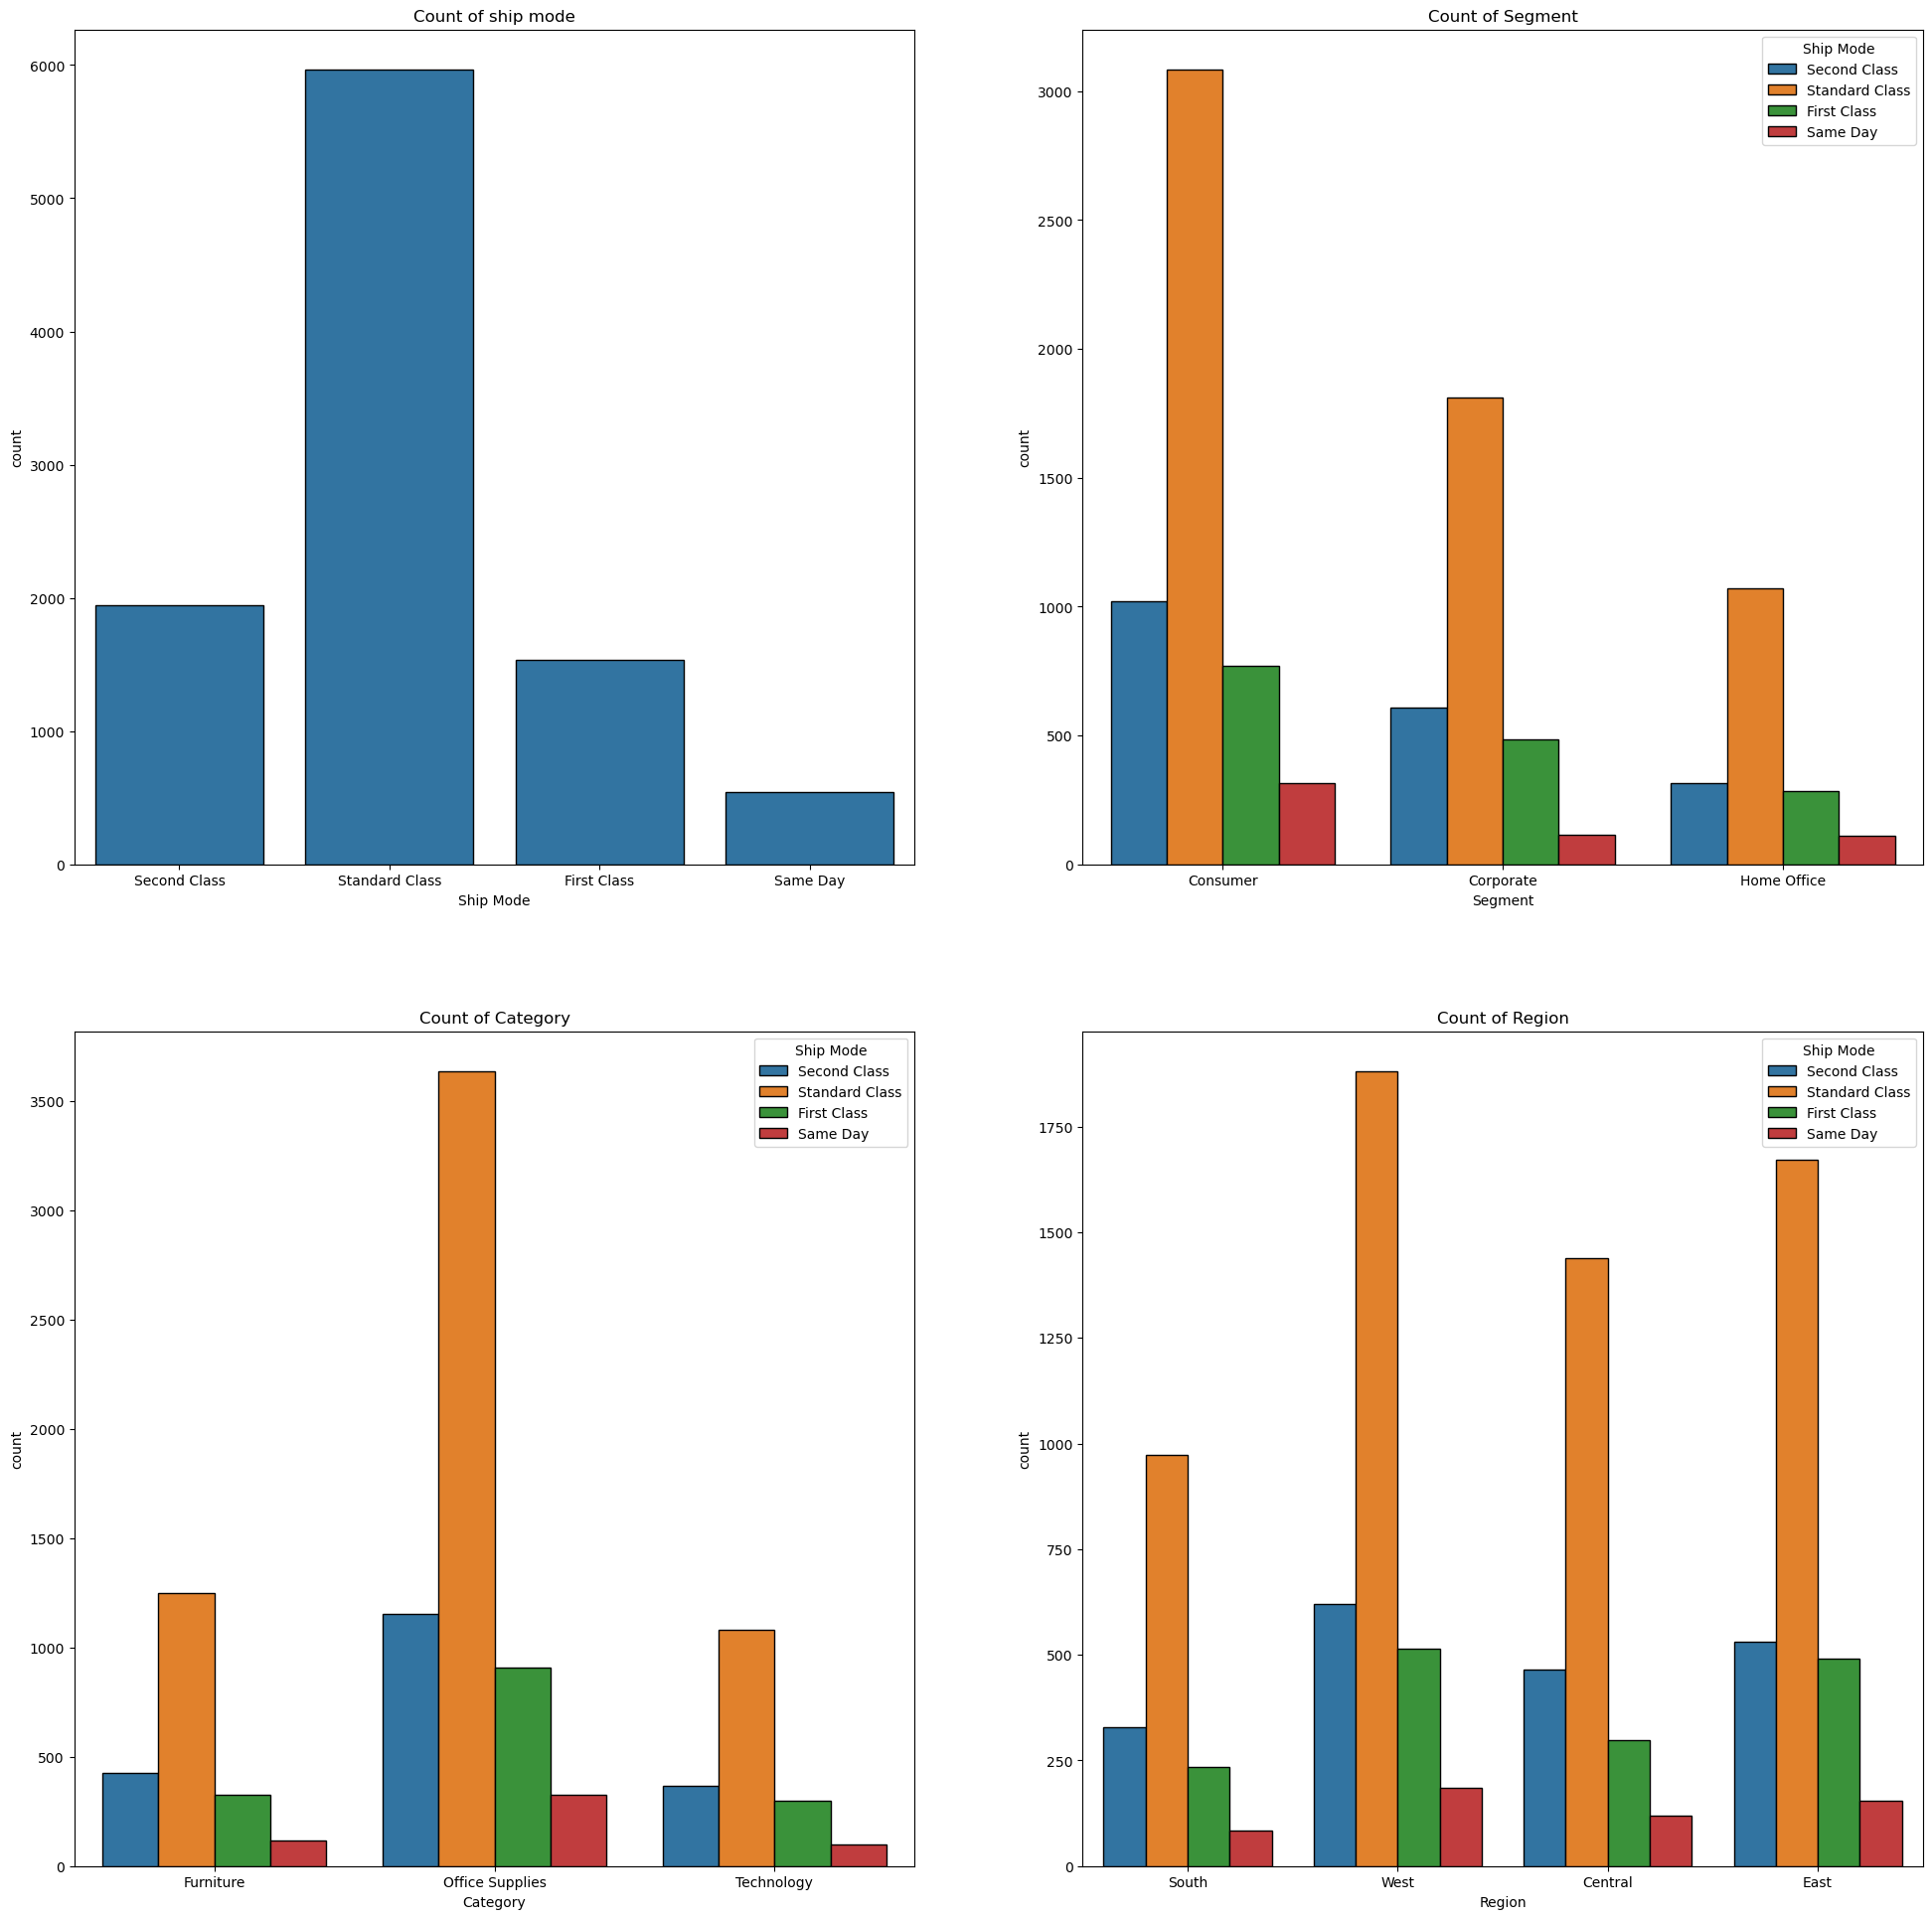

In [40]:
fig = plt.figure(figsize=(24,24))
ax=fig.add_subplot(2,2,1)
sns.countplot(x="Ship Mode", data=dataset_copied, edgecolor='black')
plt.title("Count of ship mode")
ax=fig.add_subplot(2,2,2)
sns.countplot(x="Segment", data=dataset_copied, hue="Ship Mode", edgecolor='black')
plt.title("Count of Segment")
ax=fig.add_subplot(2,2,3)
sns.countplot(x="Category", data=dataset_copied, hue="Ship Mode", edgecolor='black')
plt.title("Count of Category")
ax=fig.add_subplot(2,2,4)
sns.countplot(x="Region", data=dataset_copied, hue="Ship Mode", edgecolor='black')
plt.title("Count of Region")

Text(0.5, 1.0, 'Count of Region')

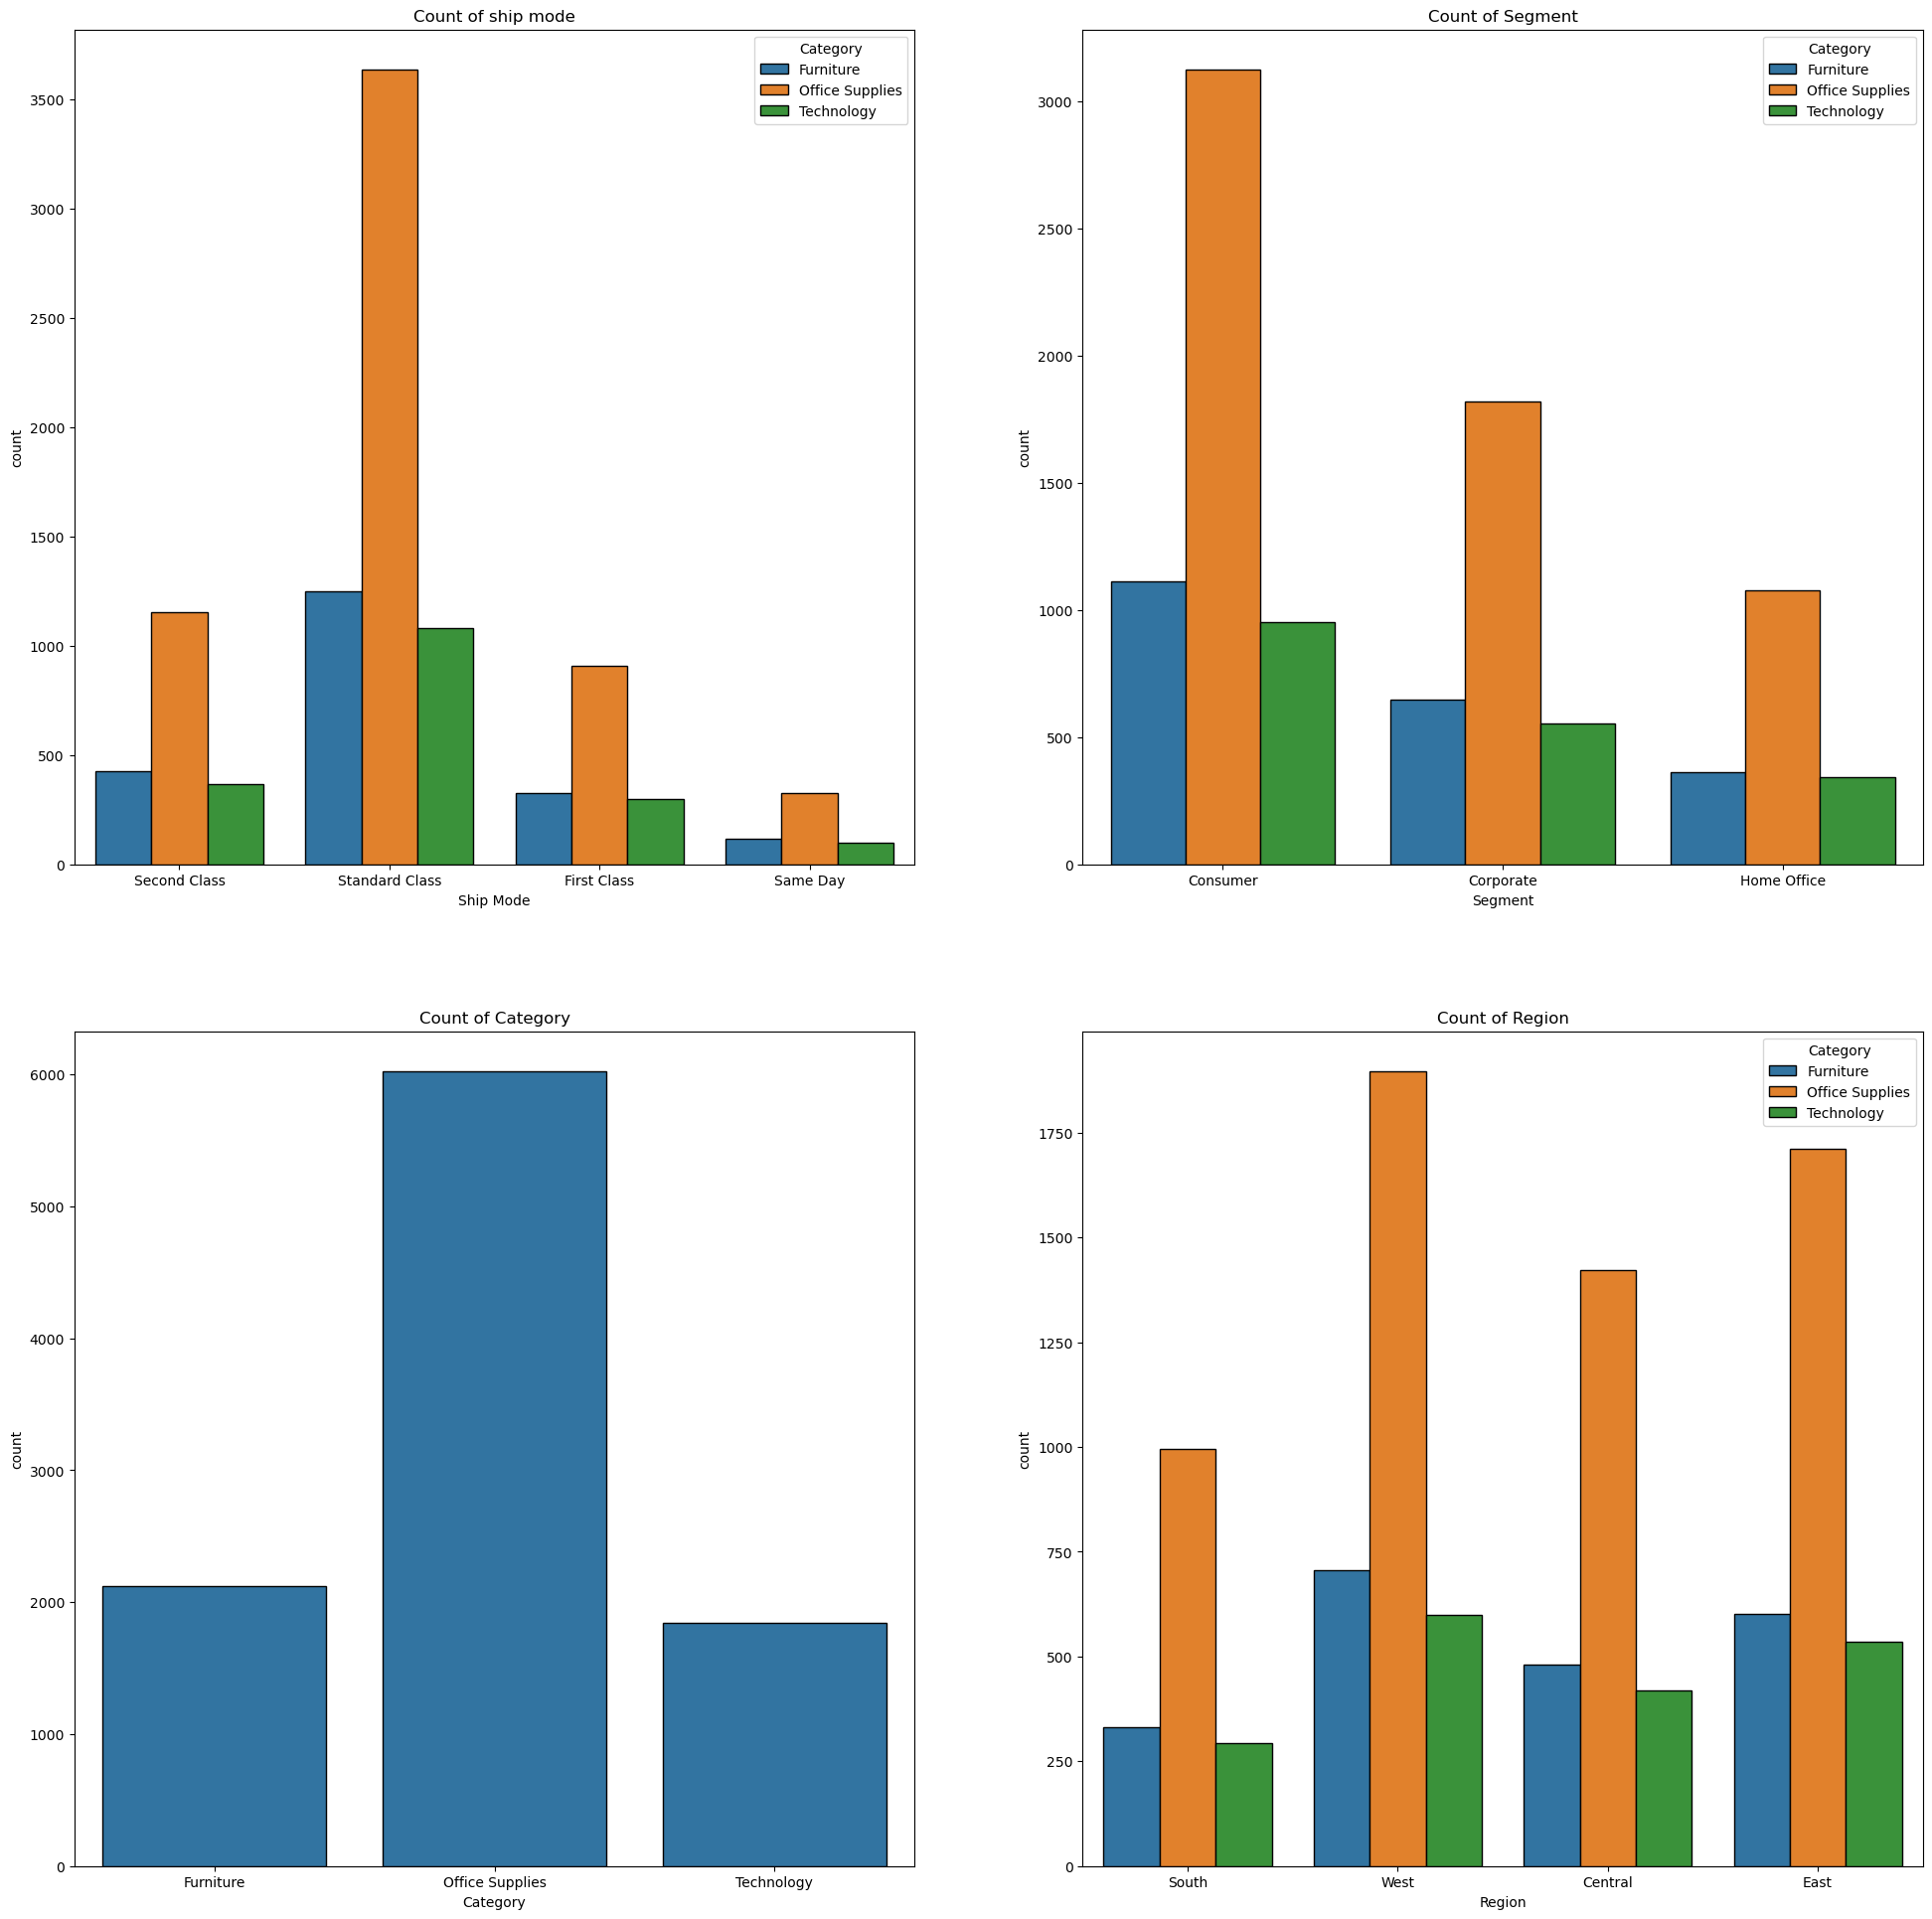

In [41]:
fig = plt.figure(figsize=(24,24))
ax=fig.add_subplot(2,2,1)
sns.countplot(x="Ship Mode", data=dataset_copied,hue="Category", edgecolor='black')
plt.title("Count of ship mode")
ax=fig.add_subplot(2,2,2)
sns.countplot(x="Segment", data=dataset_copied, hue="Category", edgecolor='black')
plt.title("Count of Segment")
ax=fig.add_subplot(2,2,3)
sns.countplot(x="Category", data=dataset_copied, edgecolor='black')
plt.title("Count of Category")
ax=fig.add_subplot(2,2,4)
sns.countplot(x="Region", data=dataset_copied, hue="Category", edgecolor='black')
plt.title("Count of Region")

Text(0.5, 1.0, 'Count of Region')

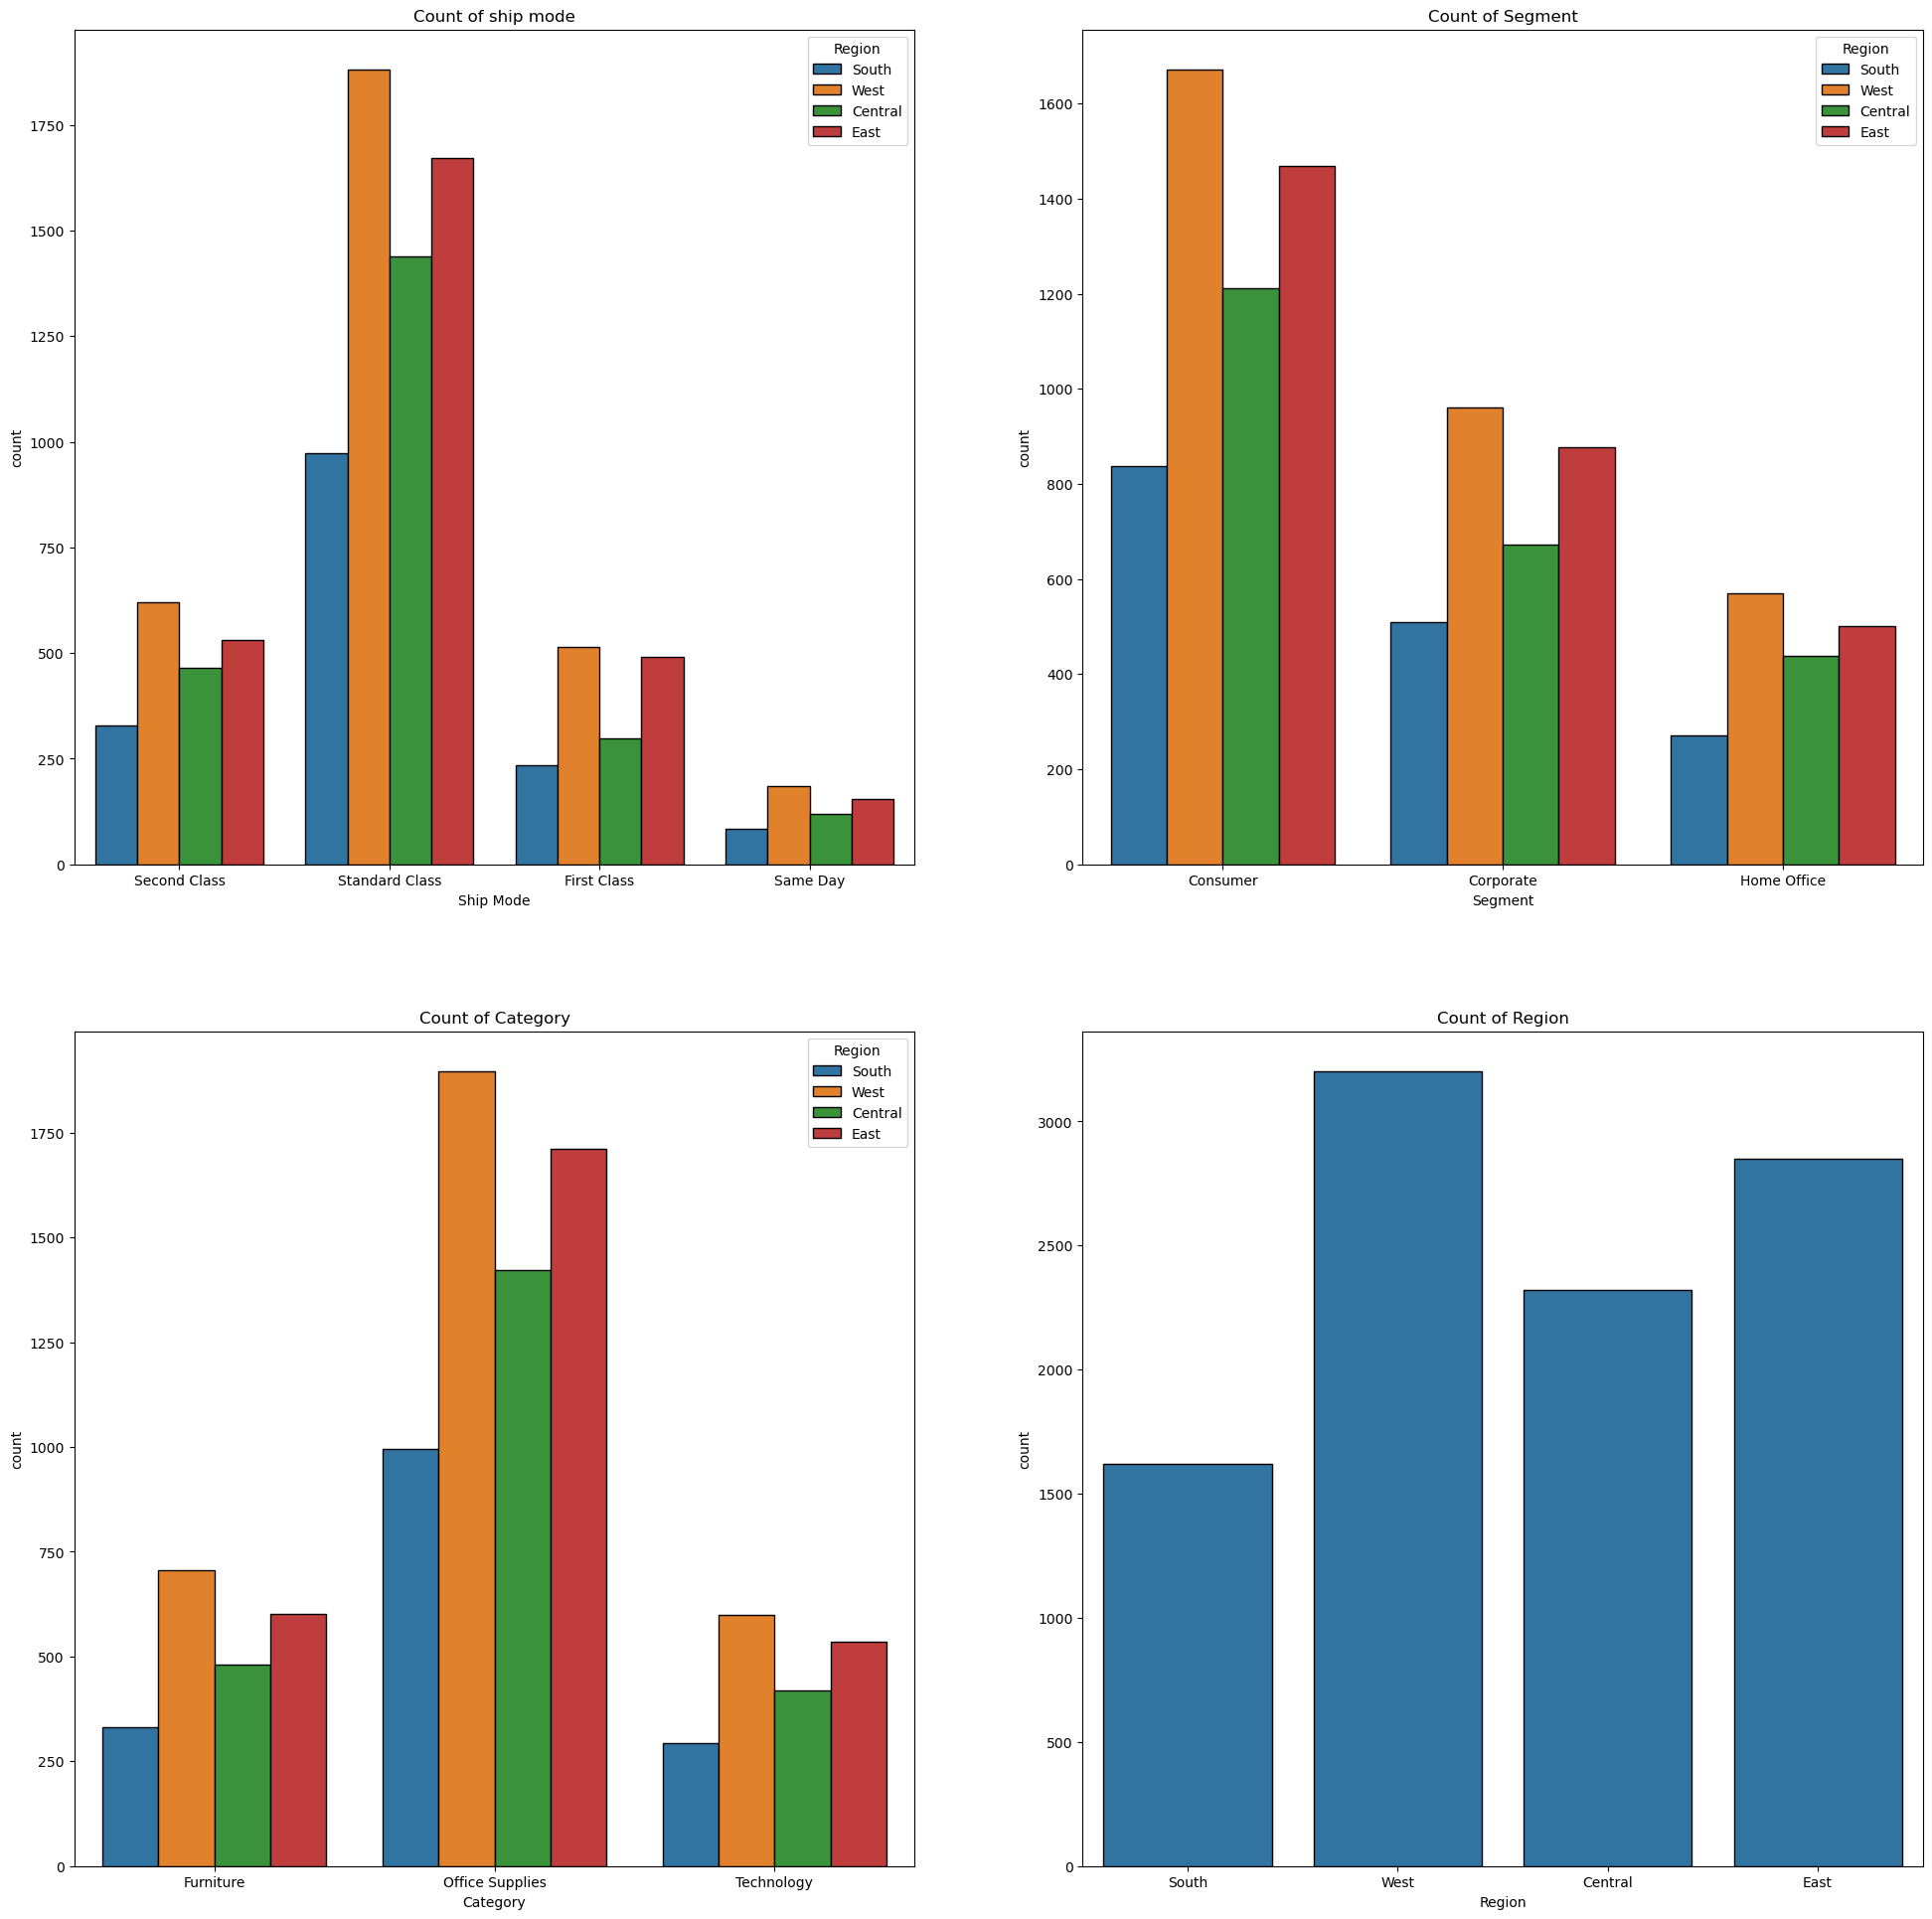

In [42]:
fig = plt.figure(figsize=(24,24))
ax=fig.add_subplot(2,2,1)
sns.countplot(x="Ship Mode", data=dataset_copied,hue="Region", edgecolor='black')
plt.title("Count of ship mode")
ax=fig.add_subplot(2,2,2)
sns.countplot(x="Segment", data=dataset_copied, hue="Region", edgecolor='black')
plt.title("Count of Segment")
ax=fig.add_subplot(2,2,3)
sns.countplot(x="Category", data=dataset_copied, hue="Region", edgecolor='black')
plt.title("Count of Category")
ax=fig.add_subplot(2,2,4)
sns.countplot(x="Region", data=dataset_copied, edgecolor='black')
plt.title("Count of Region")

In [43]:
dataset_copied.City.value_counts()

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

Text(0.5, 1.0, 'Count of State')

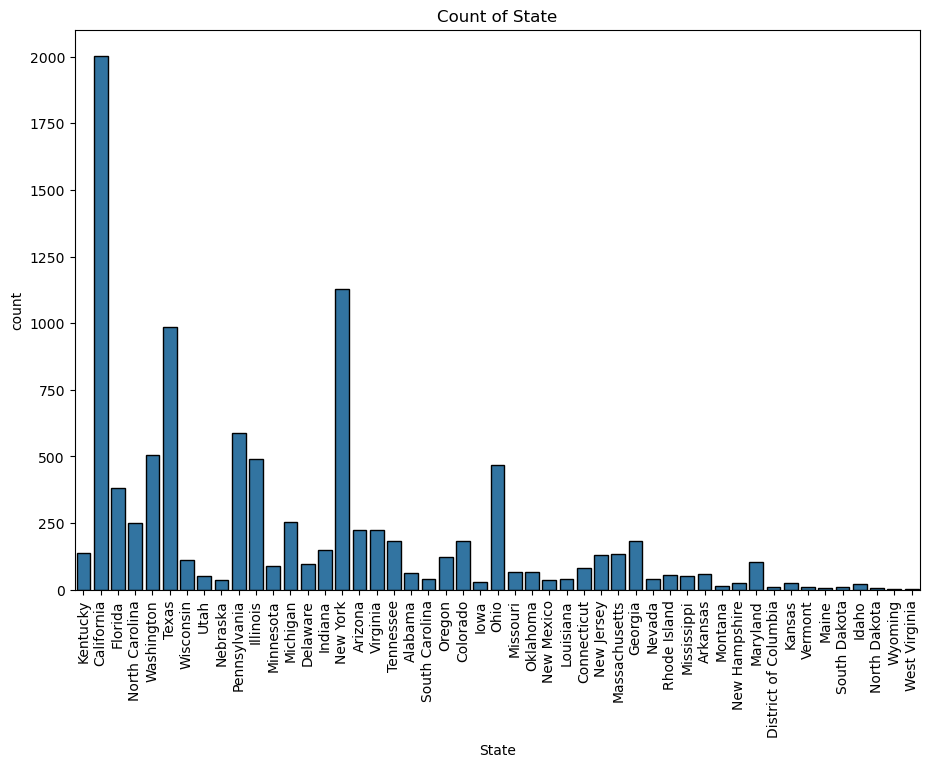

In [44]:
fig = plt.figure(figsize=(24,16))
ax=fig.add_subplot(2,2,1)
sns.countplot(x="State", data=dataset_copied, edgecolor='black')
plt.xticks(rotation=90)
plt.title("Count of State")


In [45]:
dataset_copied["Sub-Category"].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of Sub-Category')

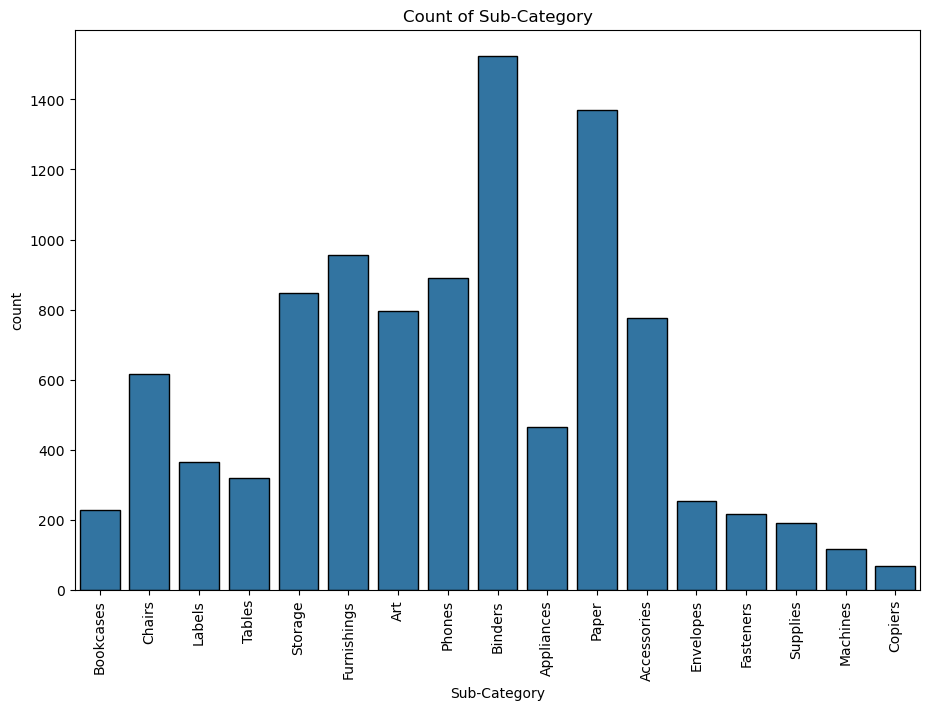

In [46]:
fig = plt.figure(figsize=(24,16))
ax=fig.add_subplot(2,2,1)
sns.countplot(x="Sub-Category", data=dataset_copied, edgecolor='black')
plt.xticks(rotation=90)
plt.title("Count of Sub-Category")

In [47]:
dataset_copied.Category.value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of sub-categories of Technology')

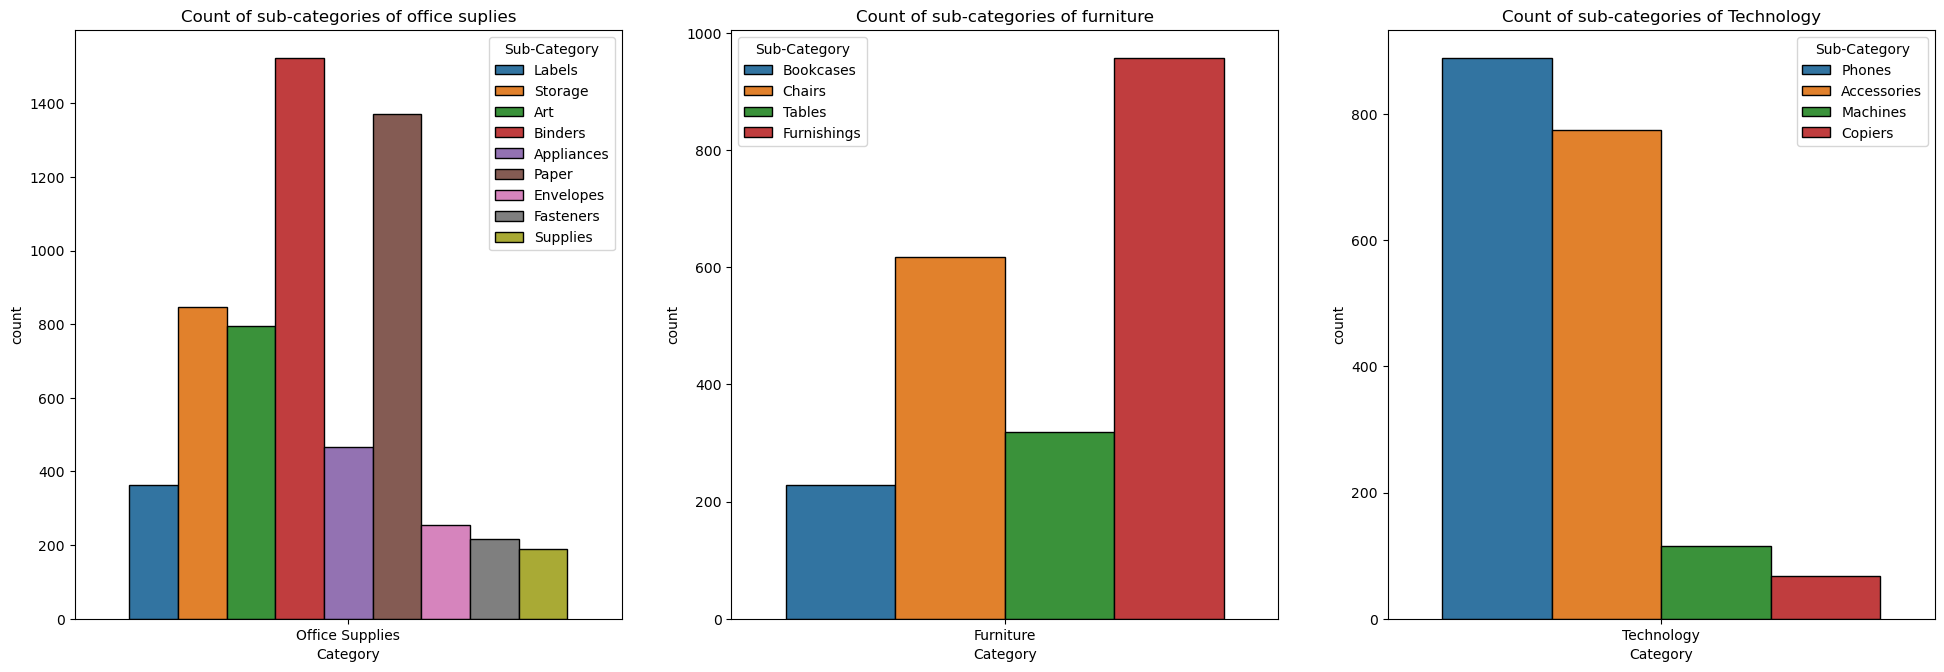

In [48]:
fig = plt.figure(figsize=(24,26))
ax=fig.add_subplot(3,3,1)
sns.countplot(x="Category", data=dataset_copied[dataset_copied["Category"]=="Office Supplies"],hue="Sub-Category", edgecolor='black', ax=ax)
plt.title("Count of sub-categories of office suplies")
ax=fig.add_subplot(3,3,2)
sns.countplot(x="Category", data=dataset_copied[dataset_copied["Category"]=="Furniture"],hue="Sub-Category", edgecolor='black', ax=ax)
plt.title("Count of sub-categories of furniture")
ax=fig.add_subplot(3,3,3)
sns.countplot(x="Category", data=dataset_copied[dataset_copied["Category"]=="Technology"],hue="Sub-Category", edgecolor='black', ax=ax)
plt.title("Count of sub-categories of Technology")

In [49]:
dataset_copied.head(2)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
2,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


# ORDER DATE =>

In [50]:
dataset_copied["Order Date"].dt.year

1       2016
2       2016
3       2016
4       2015
5       2015
        ... 
9990    2014
9991    2017
9992    2017
9993    2017
9994    2017
Name: Order Date, Length: 9994, dtype: int32

In [51]:
dataset_copied["Order_year"] = dataset_copied["Order Date"].dt.year

In [52]:
dataset_copied.head(2)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_year
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016
2,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016


In [53]:
pd.to_datetime(dataset_copied["Order Date"]).dt.month_name()

1       November
2       November
3           June
4        October
5        October
          ...   
9990     January
9991    February
9992    February
9993    February
9994         May
Name: Order Date, Length: 9994, dtype: object

In [54]:
pd.to_datetime(dataset_copied["Order Date"]).dt.day_name()

1        Tuesday
2        Tuesday
3         Sunday
4         Sunday
5         Sunday
          ...   
9990     Tuesday
9991      Sunday
9992      Sunday
9993      Sunday
9994    Thursday
Name: Order Date, Length: 9994, dtype: object

In [55]:
dataset_copied["Order_month"]=pd.to_datetime(dataset_copied["Order Date"]).dt.month_name()

In [56]:
dataset_copied["Order_day"]=pd.to_datetime(dataset_copied["Order Date"]).dt.day_name()

In [57]:
dataset_copied.head(2)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_year,Order_month,Order_day
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,November,Tuesday
2,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,November,Tuesday


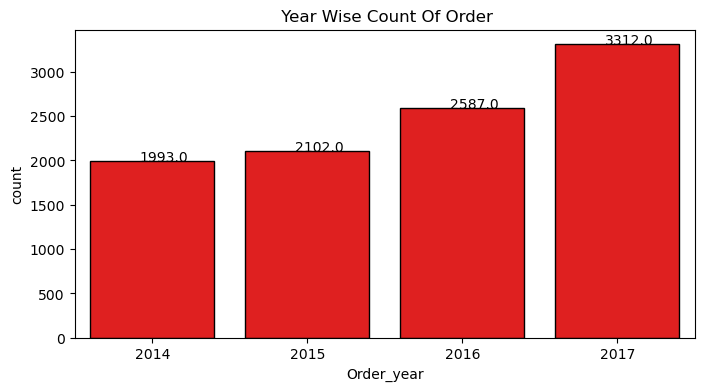

In [58]:
plt.figure(figsize=(8,4))
plt.title(" Year Wise Count Of Order")
axis = sns.countplot(x="Order_year", data=dataset_copied, color="Red", edgecolor='black')
for patch in axis.patches:
    values = patch.get_height()
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.32, values))

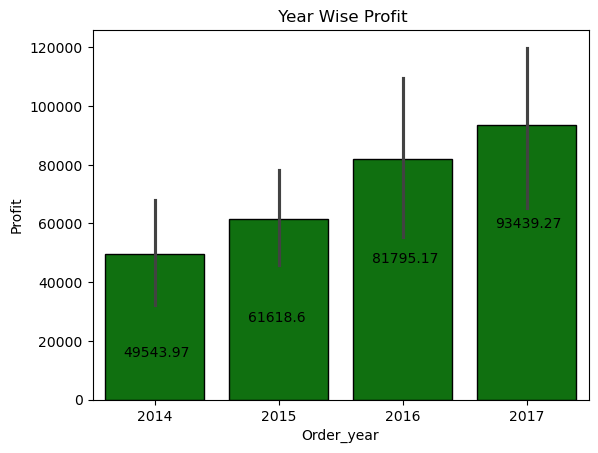

In [59]:
plt.title(" Year Wise Profit")
axis = sns.barplot(x="Order_year", y="Profit",data=dataset_copied, estimator="sum",color="Green", edgecolor='black')
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.15, values-35000))

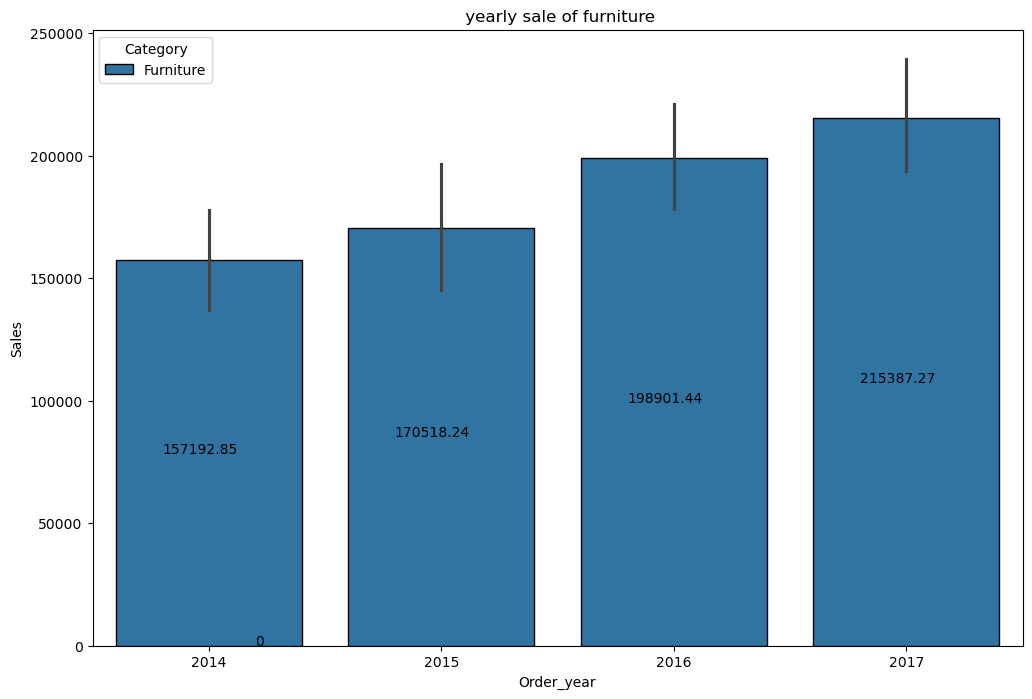

In [60]:
plt.figure(figsize=(12,8))
plt.title(" yearly sale of furniture")
axis = sns.barplot(x="Order_year", y="Sales", data=dataset_copied[dataset_copied["Category"]=="Furniture"], estimator="sum", 
            hue="Category", edgecolor="black")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.2, values/2))
plt.show()

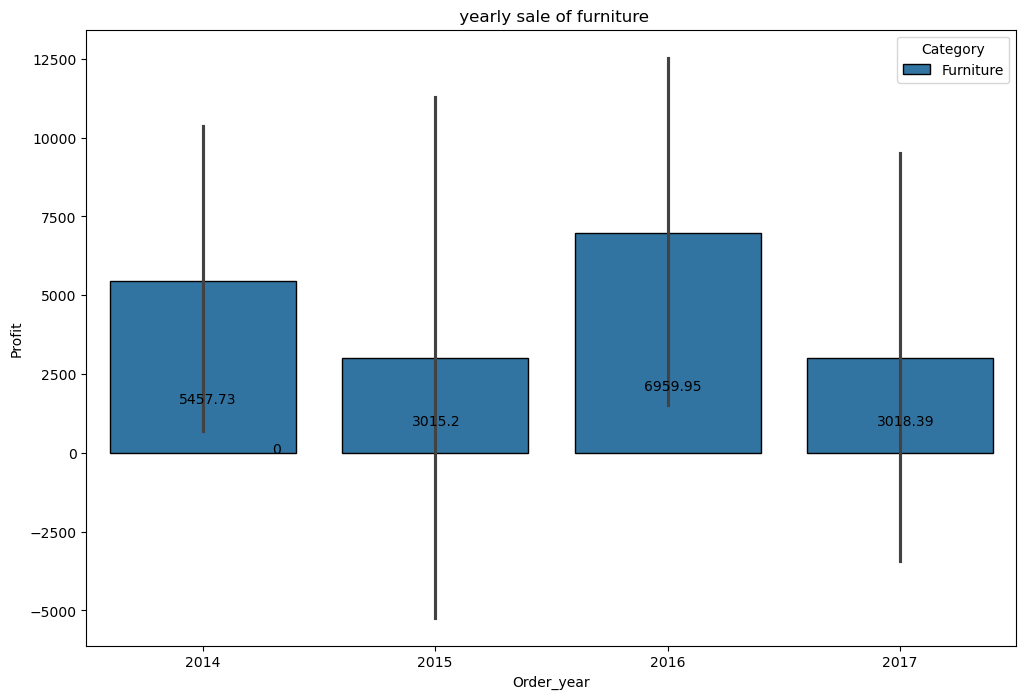

In [61]:
plt.figure(figsize=(12,8))
plt.title(" yearly sale of furniture")
axis = sns.barplot(x="Order_year", y="Profit", data=dataset_copied[dataset_copied["Category"]=="Furniture"], estimator="sum", 
            hue="Category", edgecolor="black")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.3, values/3.5))
plt.show()

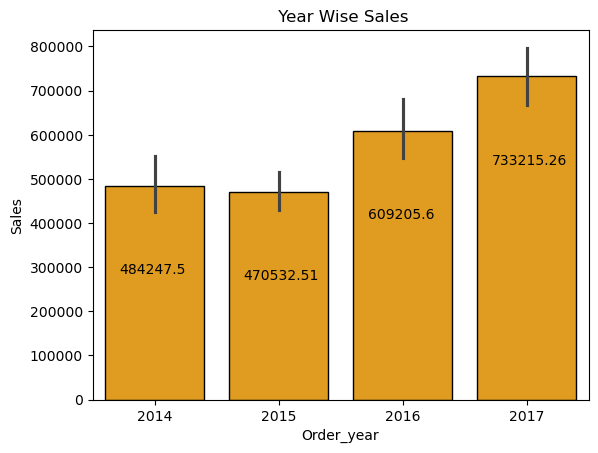

In [62]:
plt.title(" Year Wise Sales")
axis = sns.barplot(x="Order_year", y="Sales",data=dataset_copied, estimator="sum", color="Orange", edgecolor='black')
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.12, values-200000))

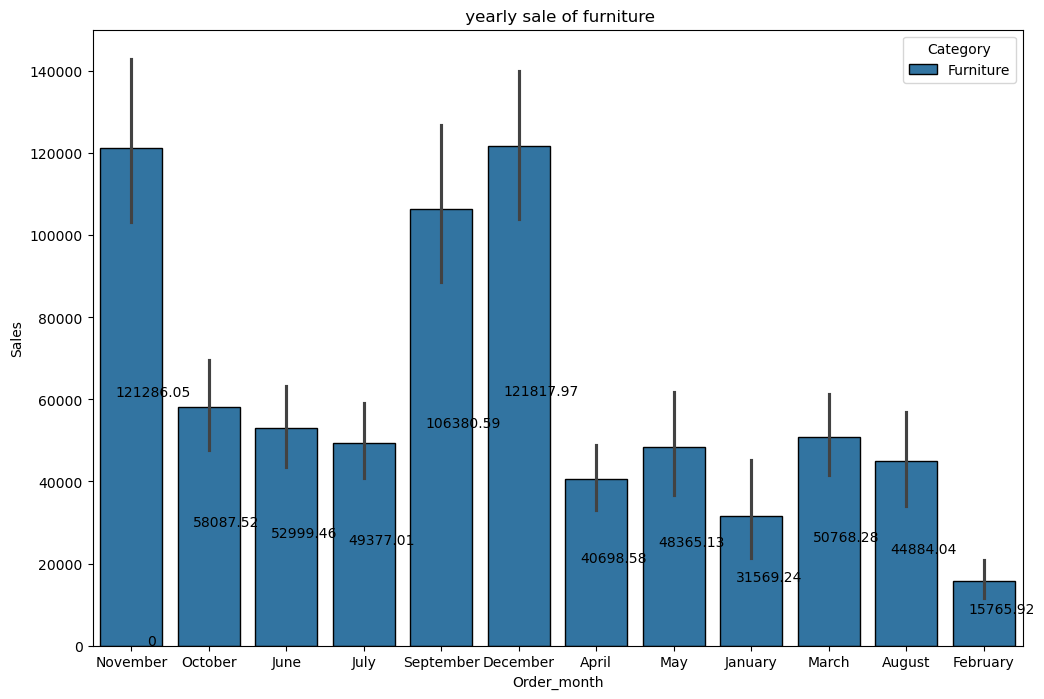

In [63]:
plt.figure(figsize=(12,8))
plt.title(" yearly sale of furniture")
axis = sns.barplot(x="Order_month", y="Sales", data=dataset_copied[dataset_copied["Category"]=="Furniture"], estimator="sum", 
            hue="Category", edgecolor="black")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.2, values/2))
plt.show()

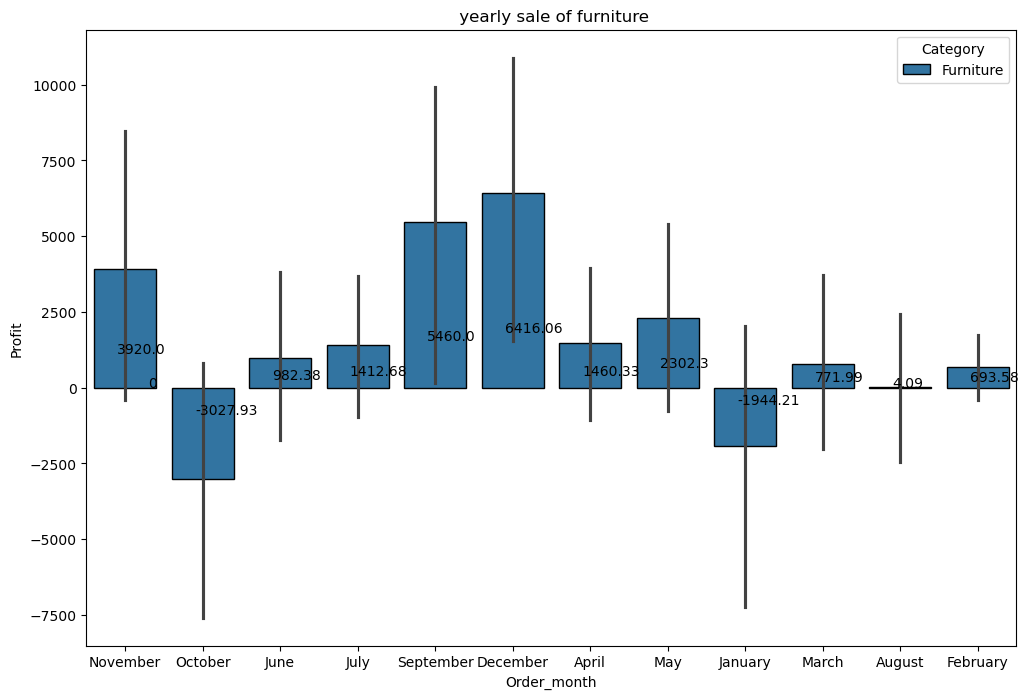

In [64]:
plt.figure(figsize=(12,8))
plt.title(" yearly sale of furniture")
axis = sns.barplot(x="Order_month", y="Profit", data=dataset_copied[dataset_copied["Category"]=="Furniture"], estimator="sum", 
            hue="Category", edgecolor="black")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.3, values/3.5))
plt.show()

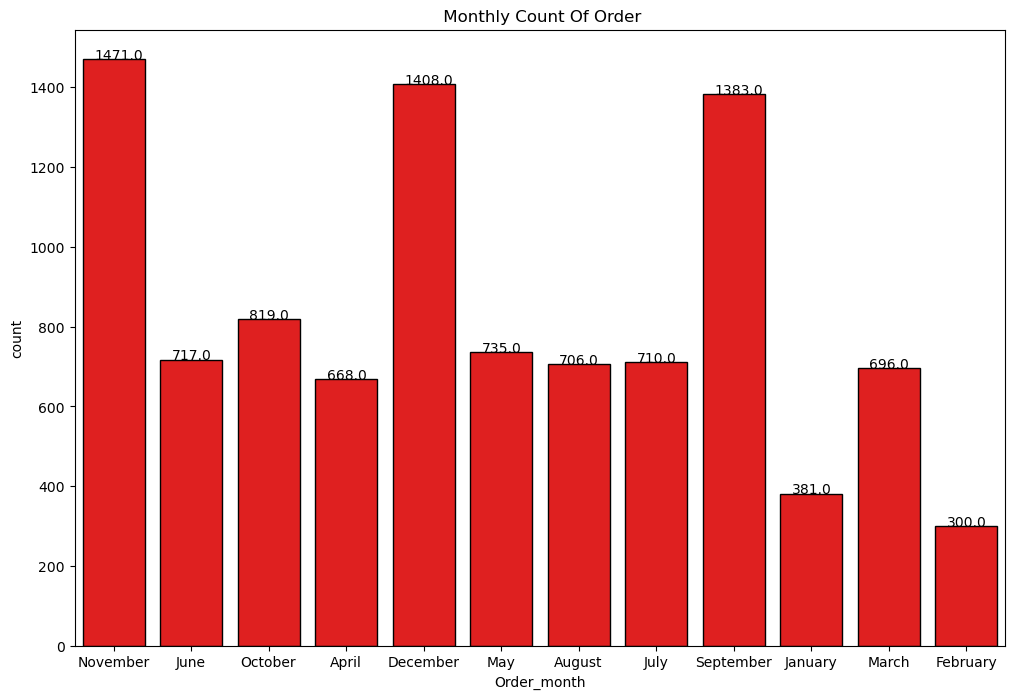

In [65]:
plt.figure(figsize=(12,8))
plt.title(" Monthly Count Of Order")
axis = sns.countplot(x="Order_month", data=dataset_copied, color="Red", edgecolor='black')
for patch in axis.patches:
    values = patch.get_height()
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.15, values))

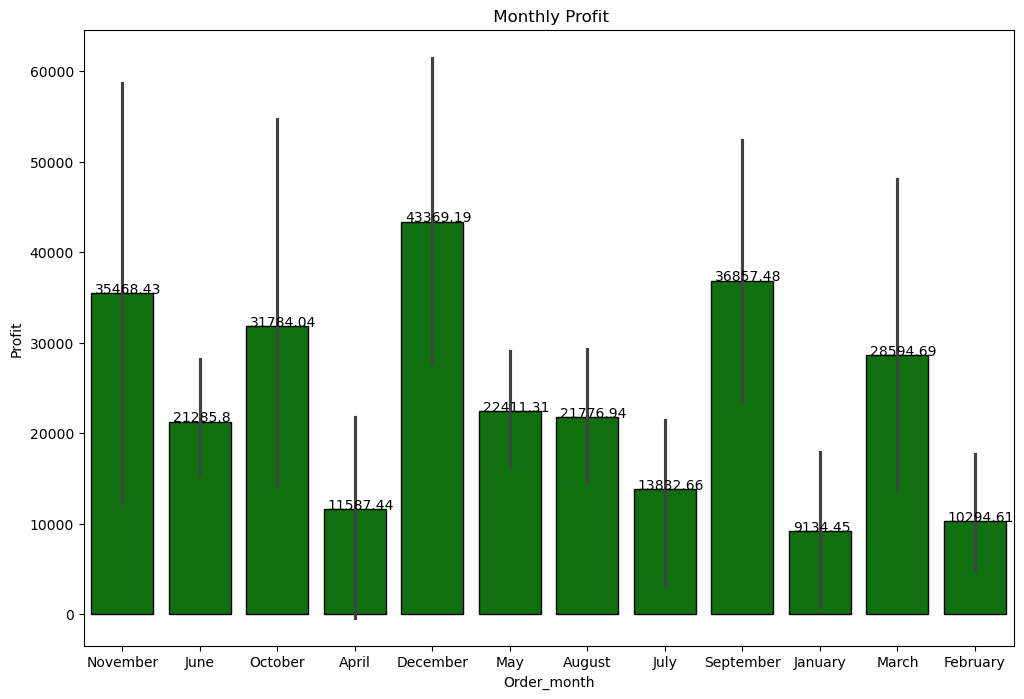

In [66]:
plt.figure(figsize=(12,8))
plt.title(" Monthly Profit")
axis = sns.barplot(x="Order_month", y="Profit",data=dataset_copied, estimator="sum",color="Green", edgecolor='black')
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.05, values))

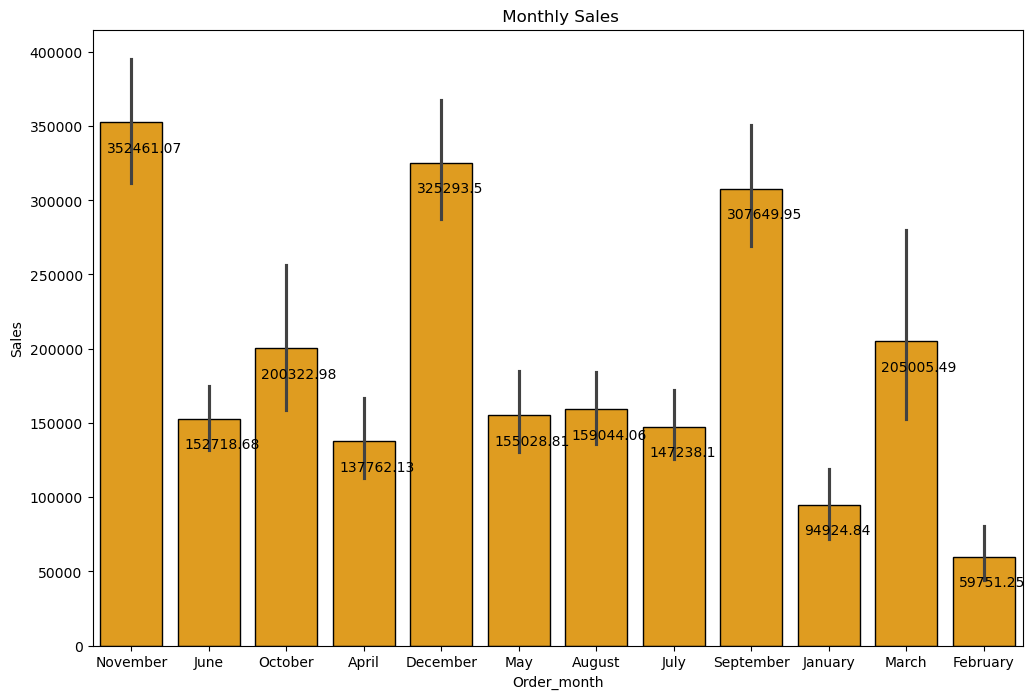

In [67]:
plt.figure(figsize=(12,8))
plt.title(" Monthly Sales")
axis = sns.barplot(x="Order_month", y="Sales",data=dataset_copied, estimator="sum", color="Orange", edgecolor='black')
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.08, values-20000))

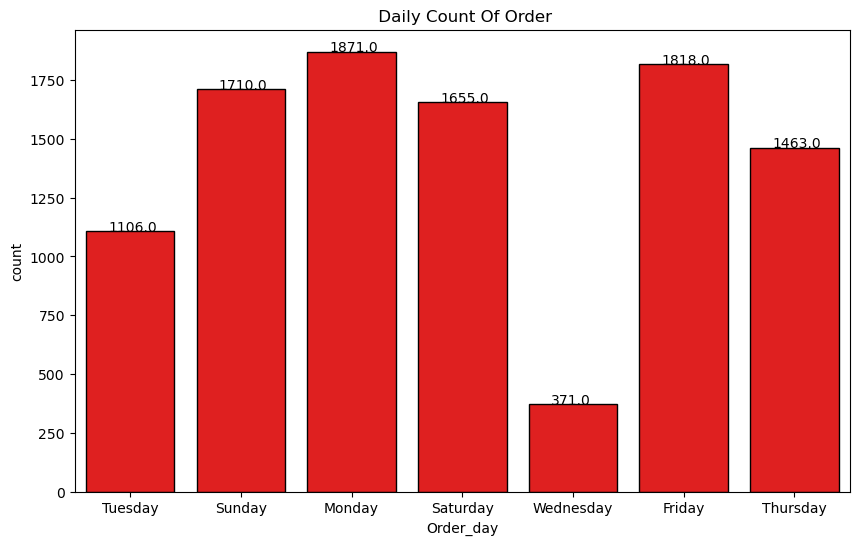

In [68]:
plt.figure(figsize=(10,6))
plt.title(" Daily Count Of Order")
axis = sns.countplot(x="Order_day", data=dataset_copied, color="Red", edgecolor='black')
for patch in axis.patches:
    values = patch.get_height()
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.2, values))

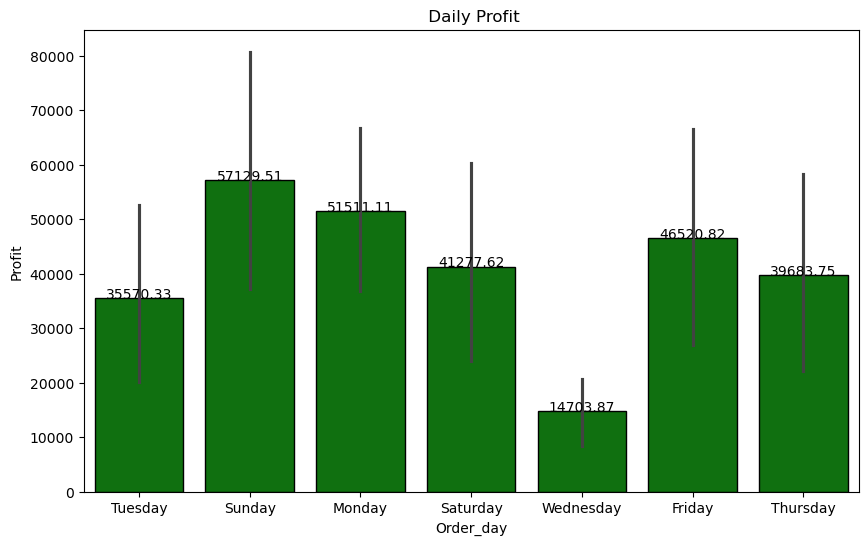

In [69]:
plt.figure(figsize=(10,6))
plt.title(" Daily Profit")
axis = sns.barplot(x="Order_day", y="Profit",data=dataset_copied, estimator="sum",color="Green", edgecolor='black')
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.10, values))

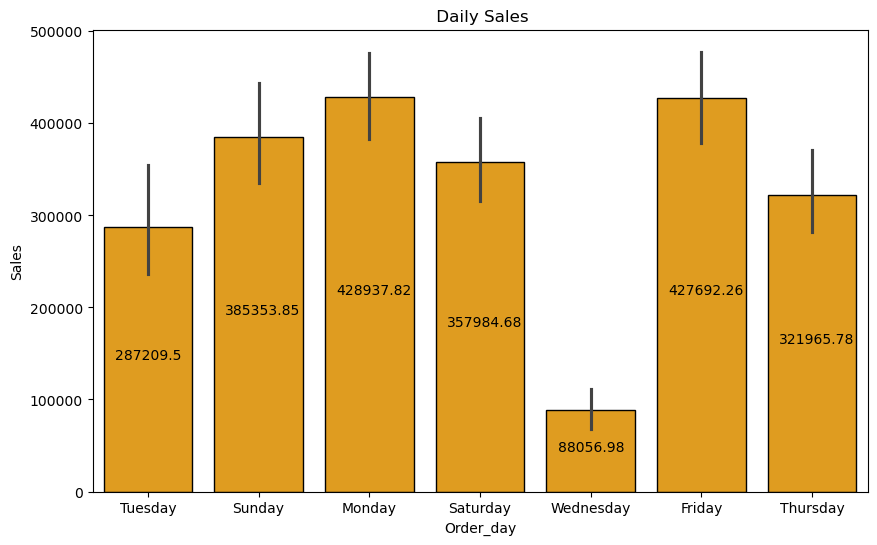

In [70]:
plt.figure(figsize=(10,6))
plt.title(" Daily Sales")
axis = sns.barplot(x="Order_day", y="Sales",data=dataset_copied, estimator="sum", color="Orange", edgecolor='black')
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.10, values/2))

# Category wise Sales & Profit =>>

In [71]:
dataset_copied.head(2)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_year,Order_month,Order_day
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,November,Tuesday
2,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,November,Tuesday


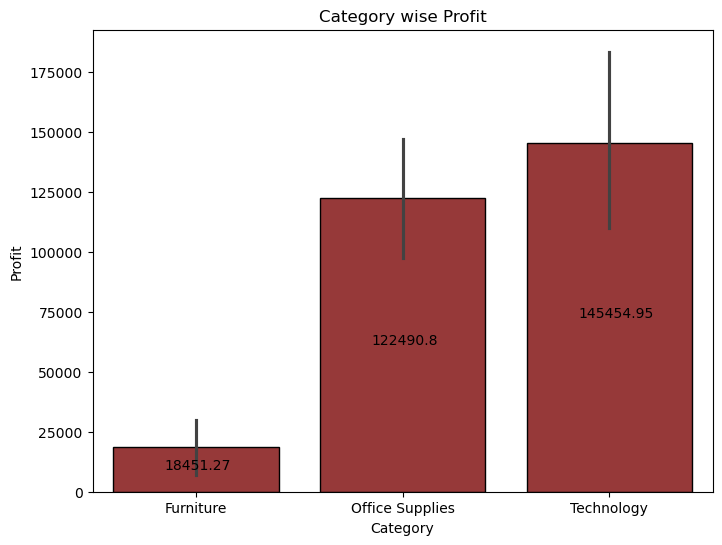

In [72]:
plt.figure(figsize=(8,6))
plt.title("Category wise Profit")
axis = sns.barplot(x="Category", y="Profit", data=dataset_copied, estimator="sum", edgecolor="black", color="brown")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.25, values/2))

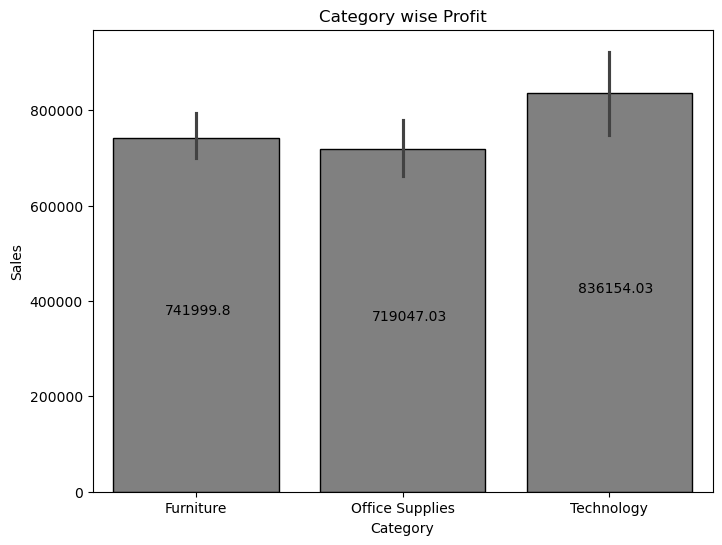

In [73]:
plt.figure(figsize=(8,6))
plt.title("Category wise Profit")
axis = sns.barplot(x="Category", y="Sales", data=dataset_copied, estimator="sum", edgecolor="black", color="gray")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.25, values/2))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

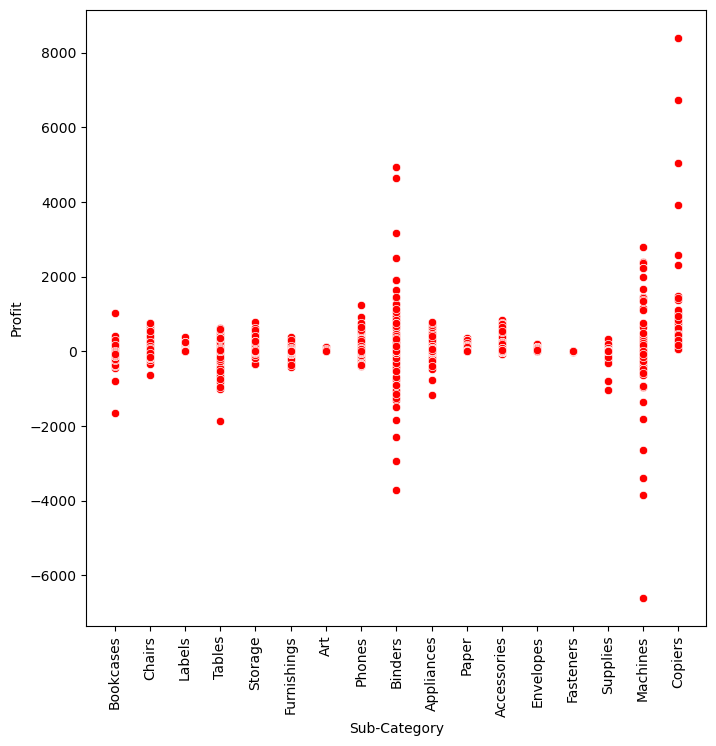

In [74]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Sub-Category", y="Profit", data=dataset_copied, color="red")
plt.xticks(rotation=90) 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

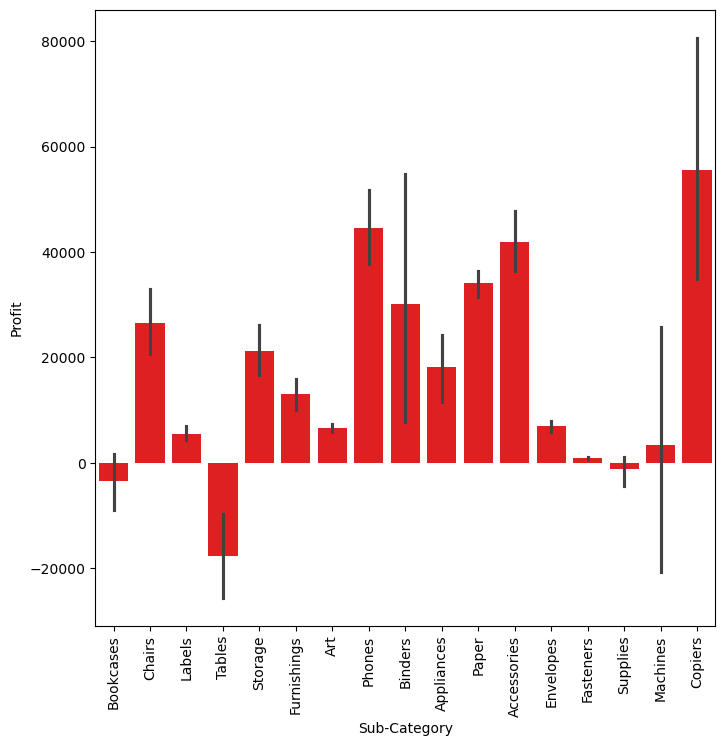

In [75]:
plt.figure(figsize=(8,8))
sns.barplot(x="Sub-Category", y="Profit", data=dataset_copied, estimator="sum",color="red")
plt.xticks(rotation=90) 

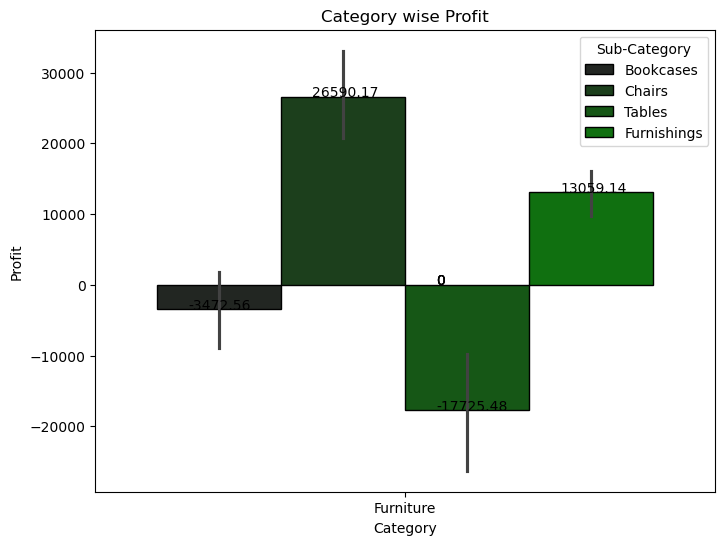

In [76]:
plt.figure(figsize=(8,6))
plt.title("Category wise Profit")
axis = sns.barplot(x="Category", y="Profit", data=dataset_copied[dataset_copied["Category"] == "Furniture"], 
                   hue="Sub-Category",estimator="sum", edgecolor="black", color="green")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.05, values))

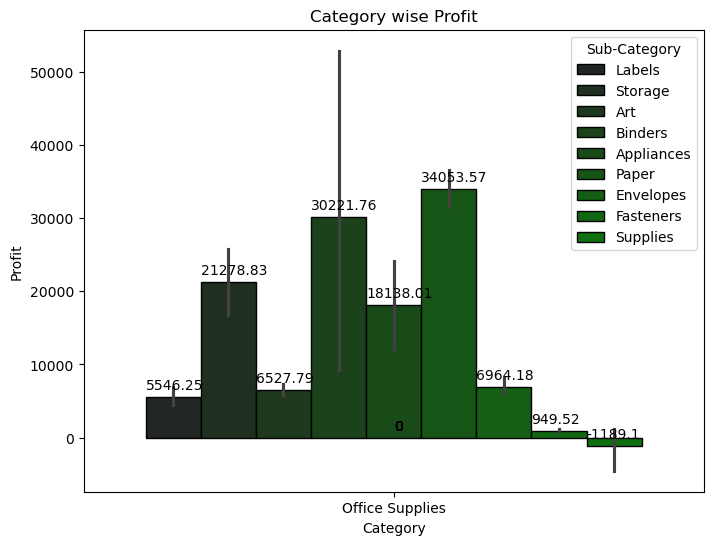

In [77]:
plt.figure(figsize=(8,6))
plt.title("Category wise Profit")
axis = sns.barplot(x="Category", y="Profit", data=dataset_copied[dataset_copied["Category"] == "Office Supplies"], 
                   hue="Sub-Category",estimator="sum", edgecolor="black", color="green")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis, values+1000))

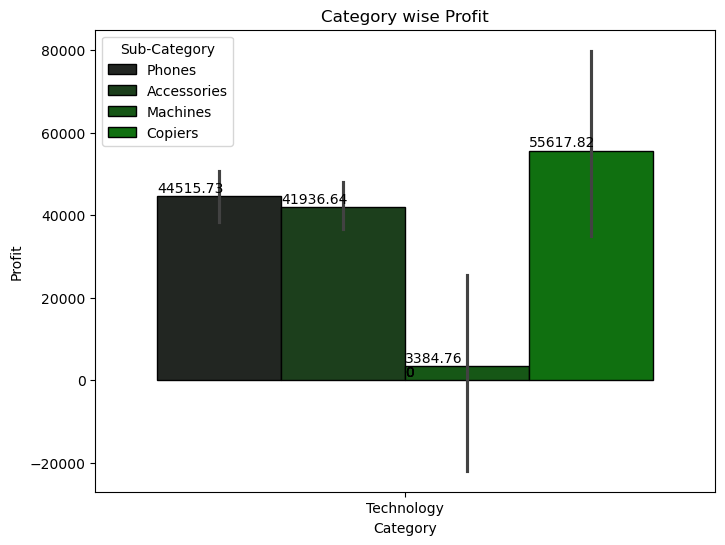

In [78]:
plt.figure(figsize=(8,6))
plt.title("Category wise Profit")
axis = sns.barplot(x="Category", y="Profit", data=dataset_copied[dataset_copied["Category"] == "Technology"], 
                   hue="Sub-Category",estimator="sum", edgecolor="black", color="green")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis, values+1000))

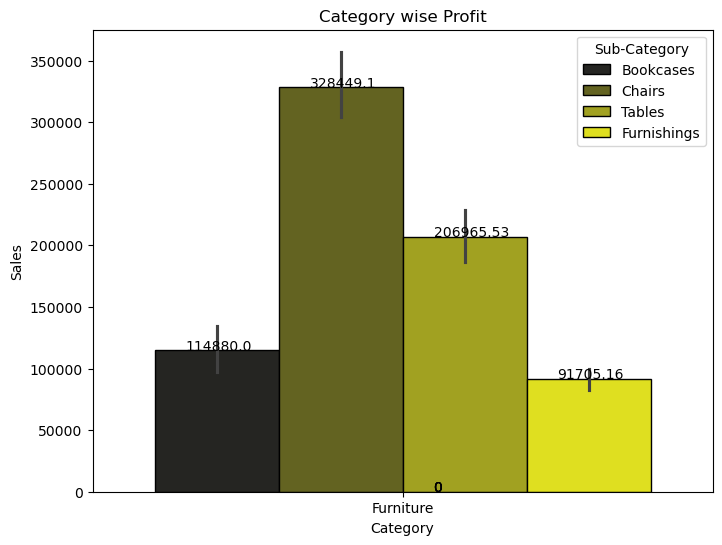

In [79]:
plt.figure(figsize=(8,6))
plt.title("Category wise Profit")
axis = sns.barplot(x="Category", y="Sales", data=dataset_copied[dataset_copied["Category"] == "Furniture"], 
                   hue="Sub-Category",estimator="sum", edgecolor="black", color="yellow")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.05, values))

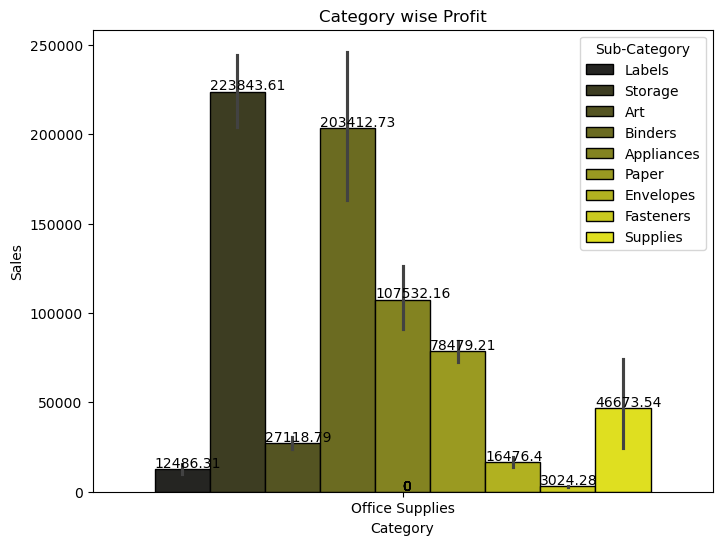

In [80]:
plt.figure(figsize=(8,6))
plt.title("Category wise Profit")
axis = sns.barplot(x="Category", y="Sales", data=dataset_copied[dataset_copied["Category"] == "Office Supplies"], 
                   hue="Sub-Category",estimator="sum", edgecolor="black", color="yellow")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis, values+1000))

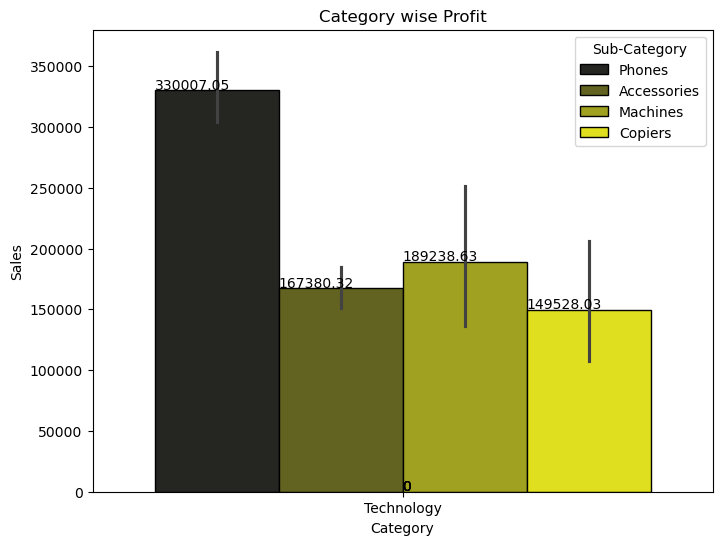

In [81]:
plt.figure(figsize=(8,6))
plt.title("Category wise Profit")
axis = sns.barplot(x="Category", y="Sales", data=dataset_copied[dataset_copied["Category"] == "Technology"], 
                   hue="Sub-Category",estimator="sum", edgecolor="black", color="yellow")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis, values+1000))

In [82]:
dataset_copied.head(2)

,Order Date,Ship Date,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_year,Order_month,Order_day
1,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,November,Tuesday
2,2016-11-08,2016-11-11,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,November,Tuesday


In [83]:
dataset_copied.drop(["Order Date","Ship Date"], axis=1, inplace=True)

In [84]:
dataset_copied.head(2)

,Ship Mode,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order_year,Order_month,Order_day
1,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2016,November,Tuesday
2,Second Class,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820,2016,November,Tuesday


In [85]:
dataset_copied["City"].value_counts()

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

In [86]:
# Get top 10 cities..
top_city = dataset_copied["City"].value_counts()[ : 10]
top_city

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: count, dtype: int64

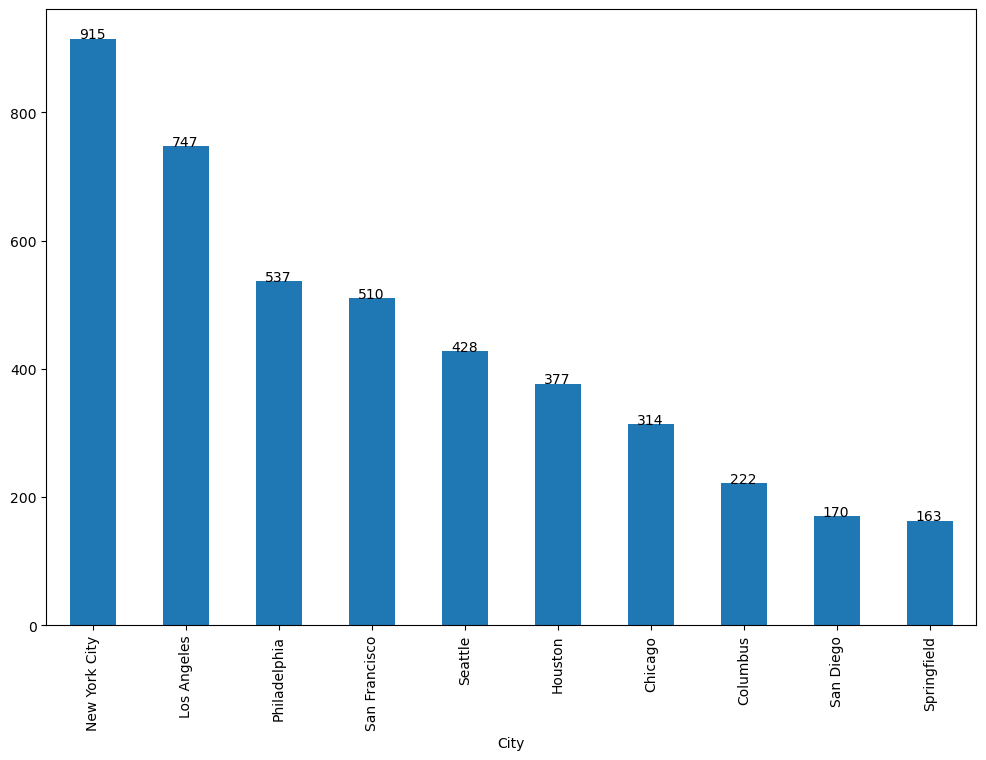

In [87]:
# sales orders from top 10 cities..
plt.figure(figsize=(12,8))
axis = top_city.plot( kind="bar")
for patch in axis.patches:
    values = patch.get_height()
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.1, values))
plt.show()

In [88]:
dataset_copied.groupby(dataset_copied["Region"])["City"].value_counts()

Region   City       
Central  Houston        377
         Chicago        314
         Dallas         157
         Detroit        115
         San Antonio     59
                       ... 
West     Pico Rivera      1
         Ontario          1
         Littleton        1
         Montebello       1
         Missoula         1
Name: count, Length: 583, dtype: int64

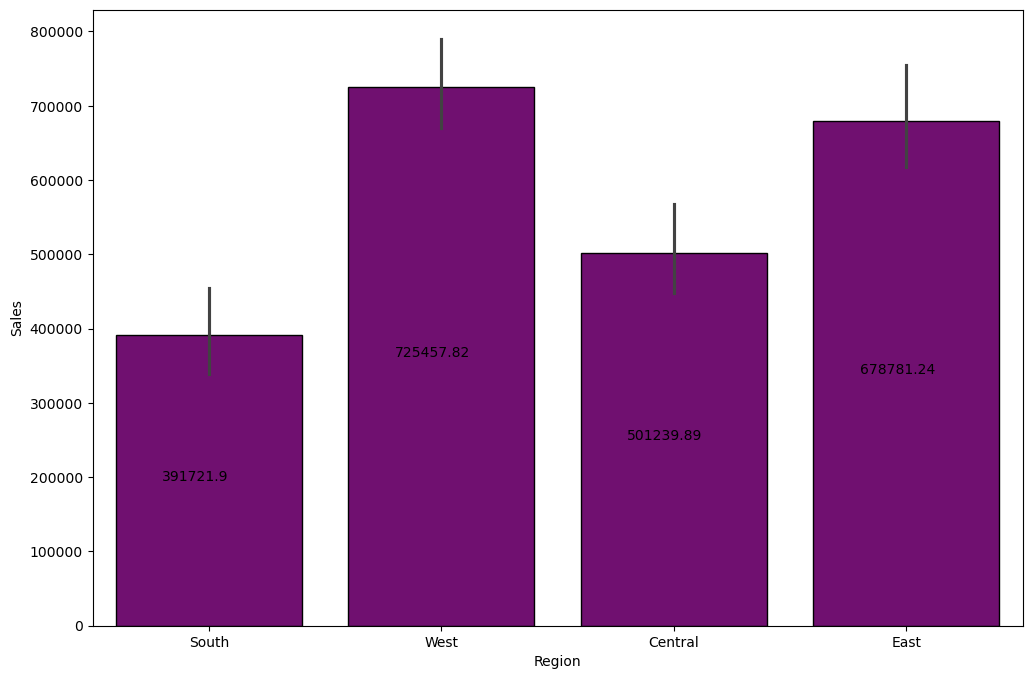

In [89]:
plt.figure(figsize=(12,8))
axis = sns.barplot(x="Region", y="Sales", data=dataset_copied, estimator="sum", color="purple", edgecolor="black")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis+0.2, values/2))
plt.show()

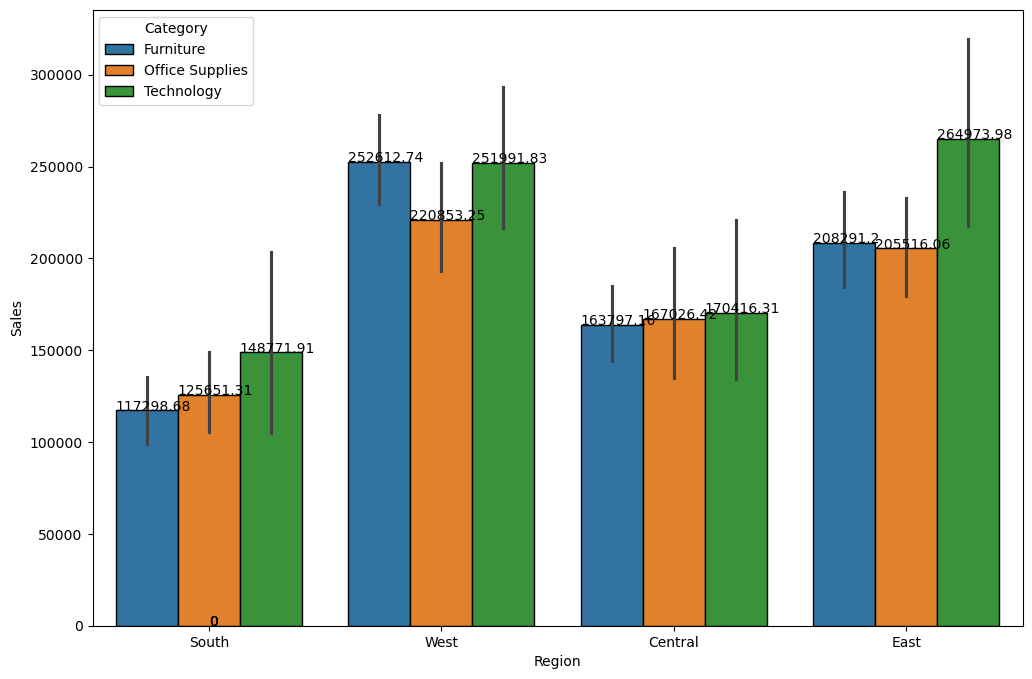

In [90]:
plt.figure(figsize=(12,8))
axis = sns.barplot(x="Region", y="Sales", data=dataset_copied, estimator="sum", hue="Category", edgecolor="black")
for patch in axis.patches:
    values = round(patch.get_height(),2)
    x_axis = patch.get_x()
    axis.annotate(values, xy=(x_axis, values+2))
plt.show()